 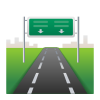
# Road_Traffic_Severity_Classification

# Description:
This data set is collected from Addis Ababa Sub-city police departments for master's research work.
The data set has been prepared from manual records of road traffic accidents of the year 2017-20.
All the sensitive information has been excluded during data encoding and finally it has 31 features
and **12316 instances** of the accident. Then it is preprocessed and for identification of major causes
of the accident by analyzing it using different machine learning classification algorithms.

Source of dataset - https://dans.knaw.nl/nl/data-diensten/narcis/


# Problem Statement:
The target feature is **Accident_severity** which is a multi-class variable. The task is to classify this
variable based on the other **31 features** step-by-step by going through each day's task. Your metric
for evaluation will be **f1-score**.

In [75]:
# importing require libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, 
                             confusion_matrix,
                             recall_score, r2_score,
                             precision_score)

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [76]:
# loading the data
rta_data = pd.read_csv(r"C:\Users\suren\RTA_Project\Dataset\RTA Dataset.csv")

In [77]:
rta_data.shape

(12316, 32)

Dataset have:
- Rows : 12316
- Columns : 32

In [78]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [79]:
# renaming columns name cappital into small character name
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
rta_data.rename(columns=col_map, inplace=True)

In [80]:
# converting 'time' to datetime
rta_data['time'] = pd.to_datetime(rta_data['time'])

In [81]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   time                     12316 non-null  datetime64[ns]
 1   day_of_week              12316 non-null  object        
 2   driver_age               12316 non-null  object        
 3   driver_sex               12316 non-null  object        
 4   educational_level        11575 non-null  object        
 5   vehicle_driver_relation  11737 non-null  object        
 6   driving_experience       11487 non-null  object        
 7   vehicle_type             11366 non-null  object        
 8   vehicle_owner            11834 non-null  object        
 9   service_year             8388 non-null   object        
 10  vehicle_defect           7889 non-null   object        
 11  accident_area            12077 non-null  object        
 12  lanes                    11931 n

In [82]:
# top 5 rows
rta_data.head()

time day_of_week driver_age driver_sex   educational_level  \
0 2023-09-15 17:02:00      Monday      18-30       Male   Above high school   
1 2023-09-15 17:02:00      Monday      31-50       Male  Junior high school   
2 2023-09-15 17:02:00      Monday      18-30       Male  Junior high school   
3 2023-09-15 01:06:00      Sunday      18-30       Male  Junior high school   
4 2023-09-15 01:06:00      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner service_year  ... vehicle_movement   casualty_class  \
0         Owner   Above 10yr  ...   Going straight               na   
1         Owner      5-10yrs  ...   Going straight               na   
2         Owner          NaN  ...   Going straight  Driver or rider   
3  Governmental          NaN  ...   Going straight       Pedestrian   
4         Owner      5-10yrs  ...   Going straight               na   

  casualty_sex casualty_age casualty_severity casualty_work casualty_fitness  \
0           na           na                na           NaN              NaN   
1           na           na                na           NaN              NaN   
2         Male        31-50                 3        Driver              NaN   
3       Female        18-30                 3        Driver           Normal   
4           na           na                na           NaN              NaN   

  pedestrian_movement              accident_cause accident_severity  
0    Not a Pedestrian             Moving Backward     Slight Injury  
1    Not a Pedestrian                  Overtaking     Slight Injury  
2    Not a Pedestrian   Changing lane to the left    Serious Injury  
3    Not a Pedestrian  Changing lane to the right     Slight Injury  
4    Not a Pedestrian                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [83]:
# bottom 5 rows
rta_data.tail()

time day_of_week driver_age driver_sex  \
12311 2023-09-15 16:15:00   Wednesday      31-50       Male   
12312 2023-09-15 18:00:00      Sunday    Unknown       Male   
12313 2023-09-15 13:55:00      Sunday    Over 51       Male   
12314 2023-09-15 13:55:00      Sunday      18-30     Female   
12315 2023-09-15 13:55:00      Sunday      18-30       Male   

        educational_level vehicle_driver_relation driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

          vehicle_type vehicle_owner service_year  ... vehicle_movement  \
12311   Lorry (11?40Q)         Owner          NaN  ...   Going straight   
12312       Automobile         Owner          NaN  ...            Other   
12313            Bajaj         Owner       2-5yrs  ...            Other   
12314  Lorry (41?100Q)         Owner       2-5yrs  ...            Other   
12315            Other         Owner       2-5yrs  ...         Stopping   

        casualty_class casualty_sex casualty_age casualty_severity  \
12311               na           na           na                na   
12312               na           na           na                na   
12313  Driver or rider         Male        31-50                 3   
12314               na           na           na                na   
12315       Pedestrian       Female            5                 3   

      casualty_work casualty_fitness  \
12311        Driver           Normal   
12312        Driver           Normal   
12313        Driver           Normal   
12314        Driver           Normal   
12315        Driver           Normal   

                                     pedestrian_movement  \
12311                                   Not a Pedestrian   
12312                                   Not a Pedestrian   
12313                                   Not a Pedestrian   
12314                                   Not a Pedestrian   
12315  Crossing from nearside - masked by parked or s...   

                             accident_cause accident_severity  
12311                         No distancing     Slight Injury  
12312                         No distancing     Slight Injury  
12313            Changing lane to the right    Serious Injury  
12314  Driving under the influence of drugs     Slight Injury  
12315            Changing lane to the right     Slight Injury  

[5 rows x 32 columns]

In [84]:
# statistical represention of the int data type columns
rta_data.describe()

vehicles_involved    casualties
count       12316.000000  12316.000000
mean            2.040679      1.548149
std             0.688790      1.007179
min             1.000000      1.000000
25%             2.000000      1.000000
50%             2.000000      1.000000
75%             2.000000      2.000000
max             7.000000      8.000000

In [85]:
# finding the unique values counts
rta_data.describe(include=['O']).T

count unique  \
day_of_week              12316      7   
driver_age               12316      5   
driver_sex               12316      3   
educational_level        11575      7   
vehicle_driver_relation  11737      4   
driving_experience       11487      7   
vehicle_type             11366     17   
vehicle_owner            11834      4   
service_year              8388      6   
vehicle_defect            7889      3   
accident_area            12077     14   
lanes                    11931      7   
road_allignment          12174      9   
junction_type            11429      8   
surface_type             12144      5   
road_surface_conditions  12316      4   
light_condition          12316      4   
weather_condition        12316      9   
collision_type           12161     10   
vehicle_movement         12008     13   
casualty_class           12316      4   
casualty_sex             12316      3   
casualty_age             12316      6   
casualty_severity        12316      4   
casualty_work             9118      7   
casualty_fitness          9681      5   
pedestrian_movement      12316      9   
accident_cause           12316     20   
accident_severity        12316      3   

                                                                      top  \
day_of_week                                                        Friday   
driver_age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
vehicle_type                                                   Automobile   
vehicle_owner                                                       Owner   
service_year                                                      Unknown   
vehicle_defect                                                  No defect   
accident_area                                                       Other   
lanes                    Two-way (divided with broken lines road marking)   
road_allignment                            Tangent road with flat terrain   
junction_type                                                     Y Shape   
surface_type                                                Asphalt roads   
road_surface_conditions                                               Dry   
light_condition                                                  Daylight   
weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
casualty_class                                            Driver or rider   
casualty_sex                                                         Male   
casualty_age                                                           na   
casualty_severity                                                       3   
casualty_work                                                      Driver   
casualty_fitness                                                   Normal   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   
accident_severity                                           Slight Injury   

                          freq  
day_of_week               2041  
driver_age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
vehicle_type              3205  
vehicle_owner            10459  
service_year              2883  
vehicle_defect            7777  
accident_area             3819  
lanes                     4411  
road_allignment          10459  
junction_type        

In [86]:
# checking for the duplicate data in the dataset
rta_data.duplicated().value_counts()

False    12316
dtype: int64

### Duplicate values do not exist in the dataset.
- rta_data.duplicated().value_counts() = False : not duplicate values present

- rta_data.duplicated().value_counts() = True  : Duplicate values present

In [87]:
print("Number of duplicates: ", rta_data.duplicated().sum())
print("Unique values per column: ")
rta_data.nunique()

Number of duplicates:  0
Unique values per column: 


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [88]:
# extracting hour and minute from timestamp
rta_data['hour'] = rta_data['time'].dt.hour
rta_data['minute'] = rta_data['time'].dt.minute
rta_data.drop('time', axis=1, inplace=True)

In [89]:
rta_data.head()

day_of_week driver_age driver_sex   educational_level  \
0      Monday      18-30       Male   Above high school   
1      Monday      31-50       Male  Junior high school   
2      Monday      18-30       Male  Junior high school   
3      Sunday      18-30       Male  Junior high school   
4      Sunday      18-30       Male  Junior high school   

  vehicle_driver_relation driving_experience         vehicle_type  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  vehicle_owner service_year vehicle_defect  ... casualty_sex casualty_age  \
0         Owner   Above 10yr      No defect  ...           na           na   
1         Owner      5-10yrs      No defect  ...           na           na   
2         Owner          NaN      No defect  ...         Male        31-50   
3  Governmental          NaN      No defect  ...       Female        18-30   
4         Owner      5-10yrs      No defect  ...           na           na   

  casualty_severity casualty_work casualty_fitness pedestrian_movement  \
0                na           NaN              NaN    Not a Pedestrian   
1                na           NaN              NaN    Not a Pedestrian   
2                 3        Driver              NaN    Not a Pedestrian   
3                 3        Driver           Normal    Not a Pedestrian   
4                na           NaN              NaN    Not a Pedestrian   

               accident_cause accident_severity hour  minute  
0             Moving Backward     Slight Injury   17       2  
1                  Overtaking     Slight Injury   17       2  
2   Changing lane to the left    Serious Injury   17       2  
3  Changing lane to the right     Slight Injury    1       6  
4                  Overtaking     Slight Injury    1       6  

[5 rows x 33 columns]

## Data Visualization

Numerical representation of Accident_severity column
- Slight Injury   :  10415
- Serious Injury  :  1743
- Fatal injury    :  158

Target looks like classification
Showing only top 10 of 33 categorical features


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='count', ylabel='accident_severity'>,
 [array([[<AxesSubplot: xlabel='hour', ylabel='hour'>]], dtype=object)],
 array([[<AxesSubplot: title={'center': 'minute'}>,
         <AxesSubplot: title={'center': 'vehicles_involved'}>,
         <AxesSubplot: title={'center': 'casualties'}>,
         <AxesSubplot: title={'center': 'junction_type'}>,
         <AxesSubplot: title={'center': 'driver_age'}>],
        [<AxesSubplot: title={'center': 'weather_condition'}>,
         <AxesSubplot: title={'center': 'vehicle_type'}>,
         <AxesSubplot: title={'center': 'accident_area'}>,
         <AxesSubplot: title={'center': 'accident_cause'}>,
         <AxesSubplot: title={'center': 'day_of_week'}>]], dtype=object)]

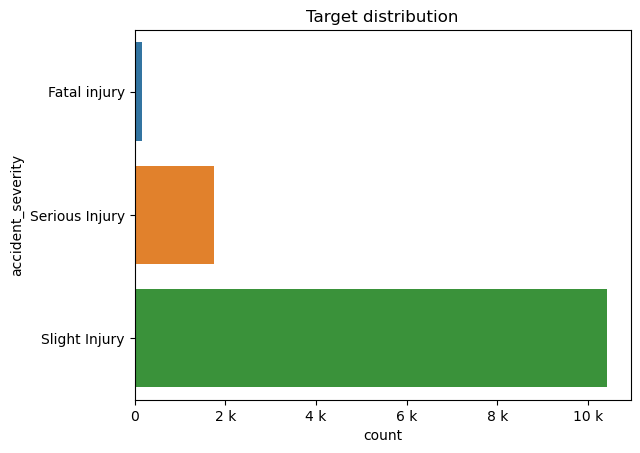

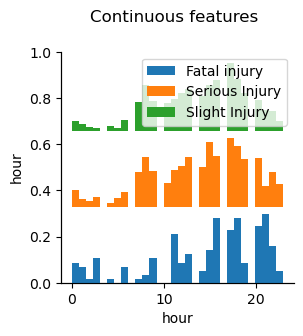

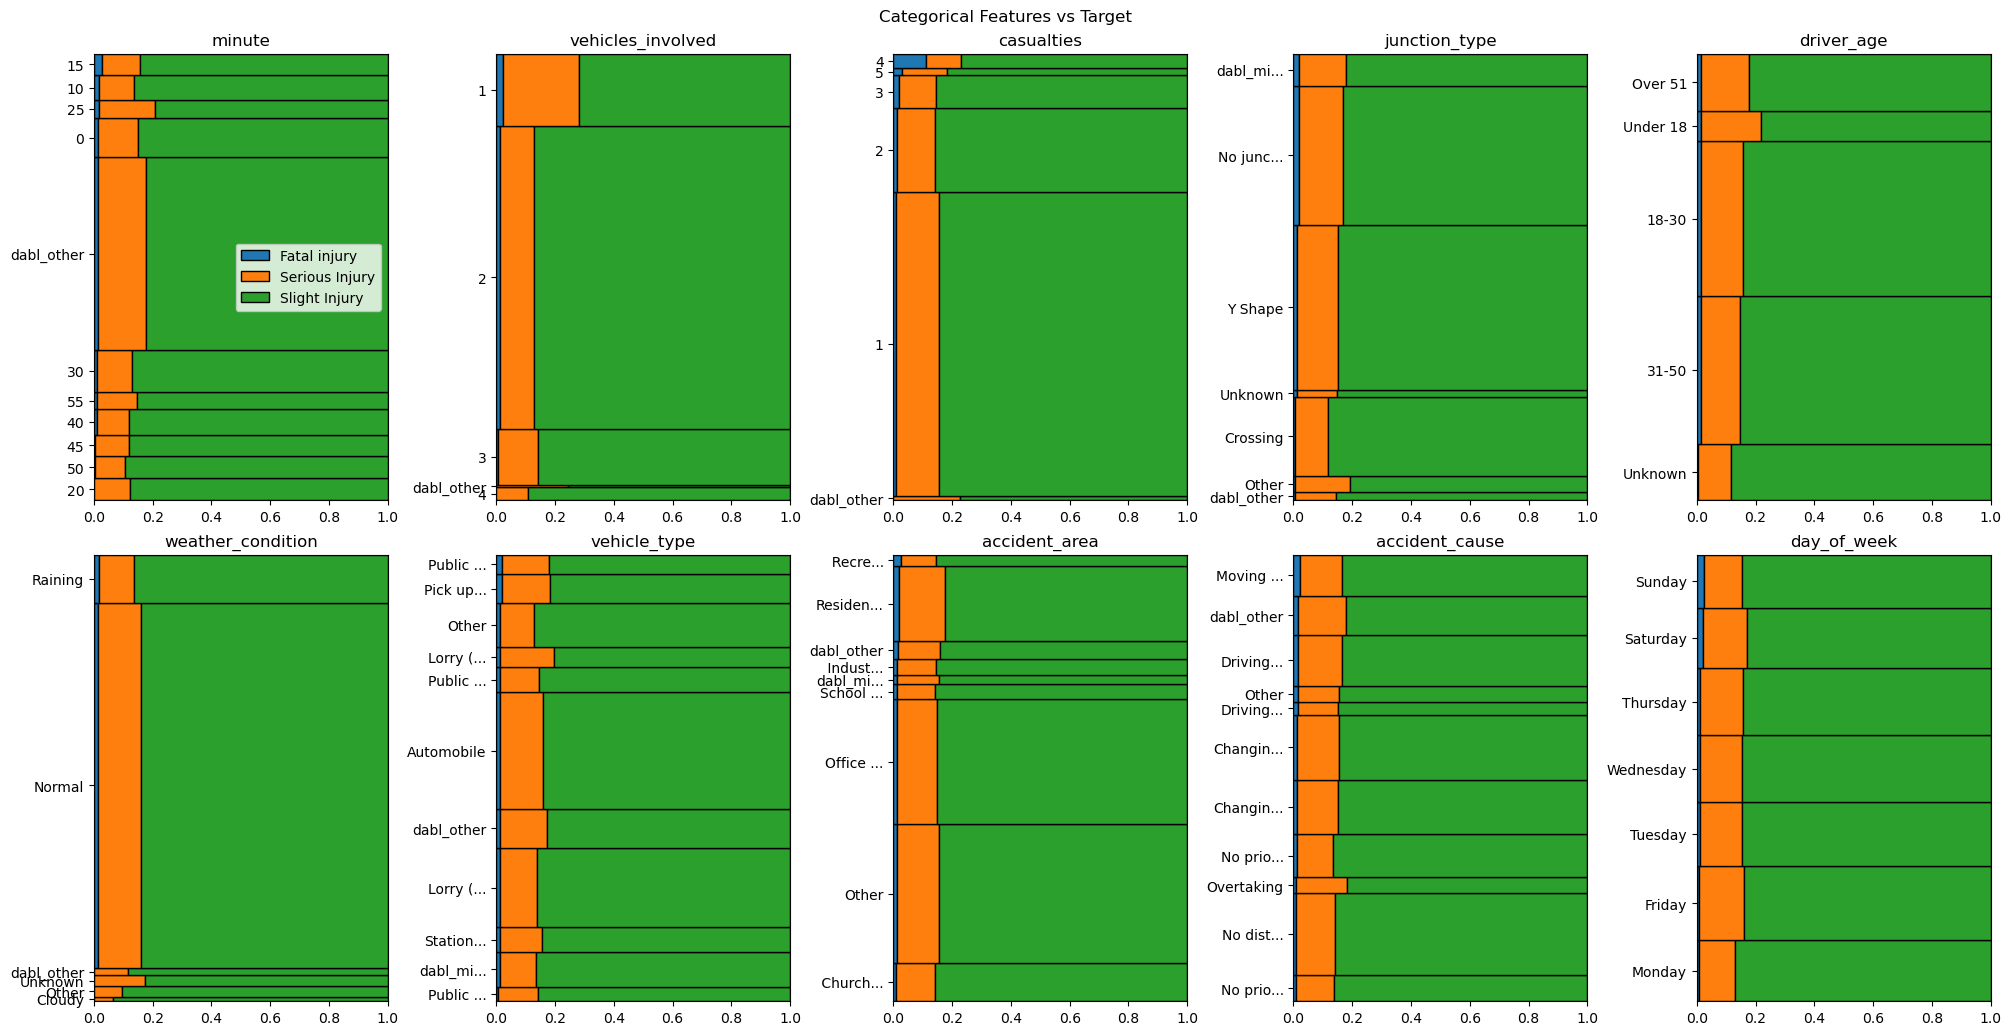

In [16]:
# Visualizing dataset using dabl library

import dabl
dabl.plot(rta_data, target_col='accident_severity')

## Categorical data visualization

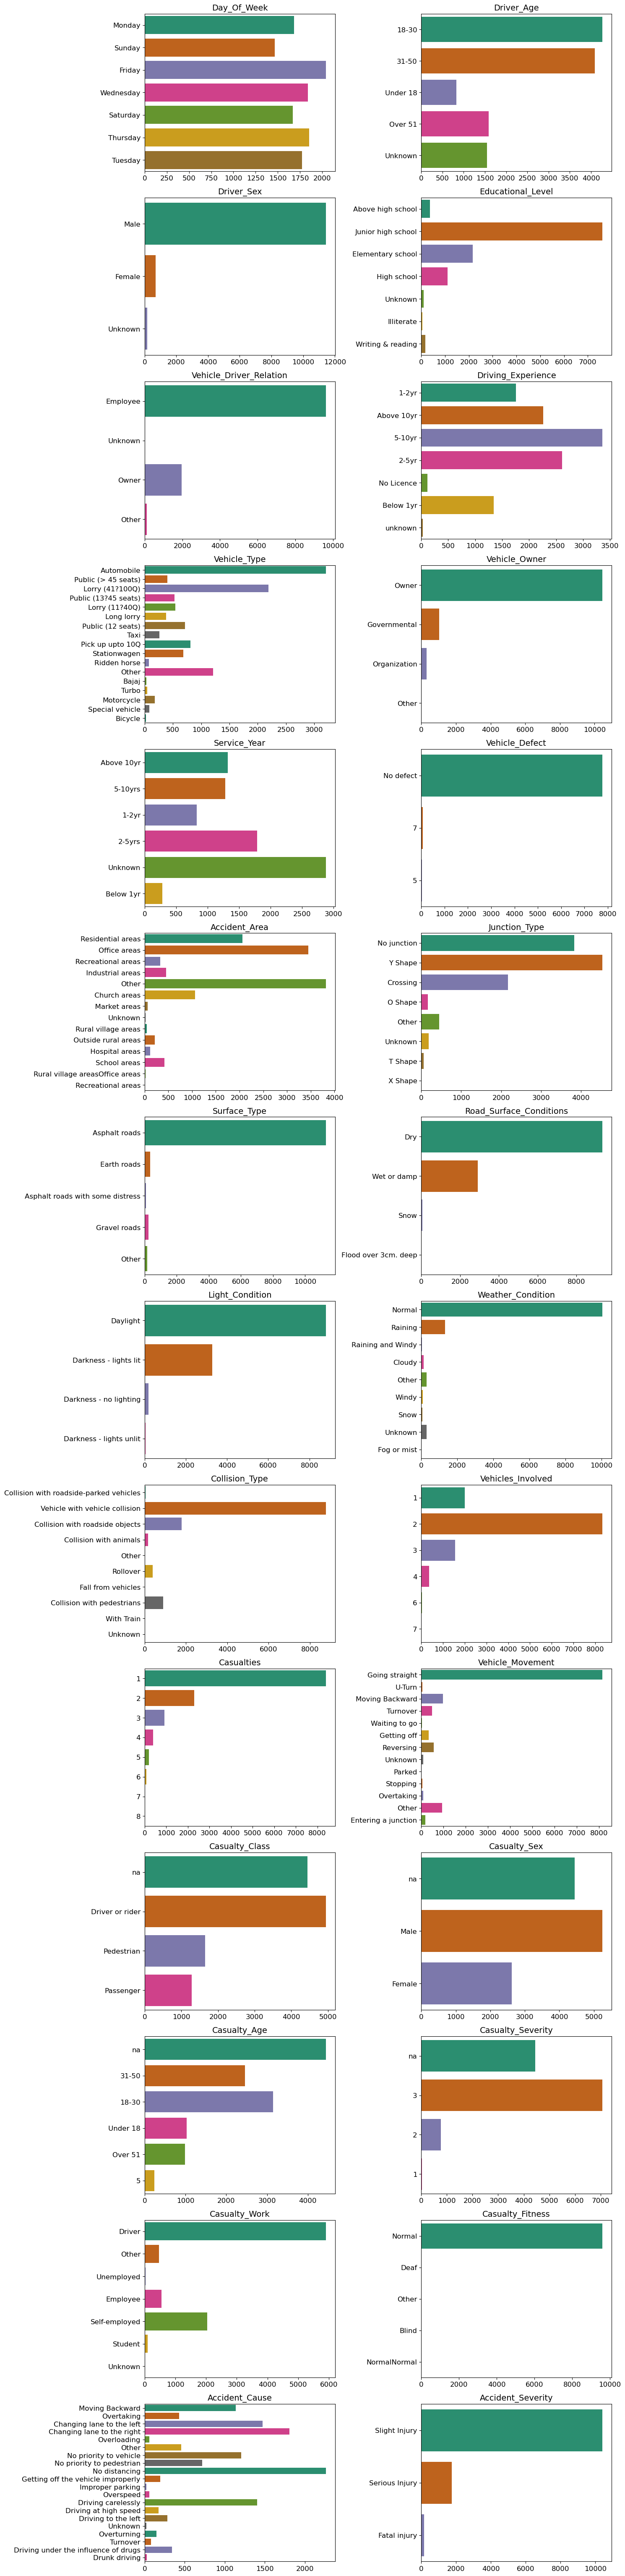

In [17]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in rta_data.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= rta_data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=rta_data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber += 1
plt.tight_layout()

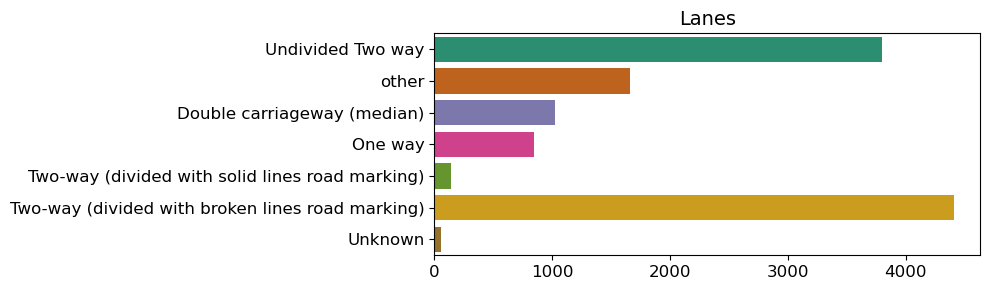

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='lanes', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

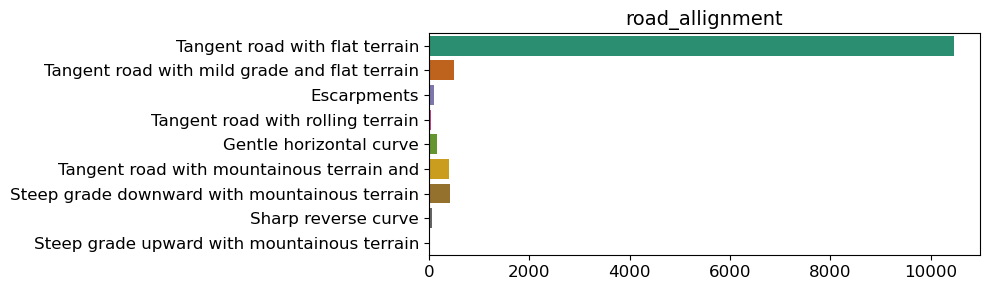

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='road_allignment', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('road_allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

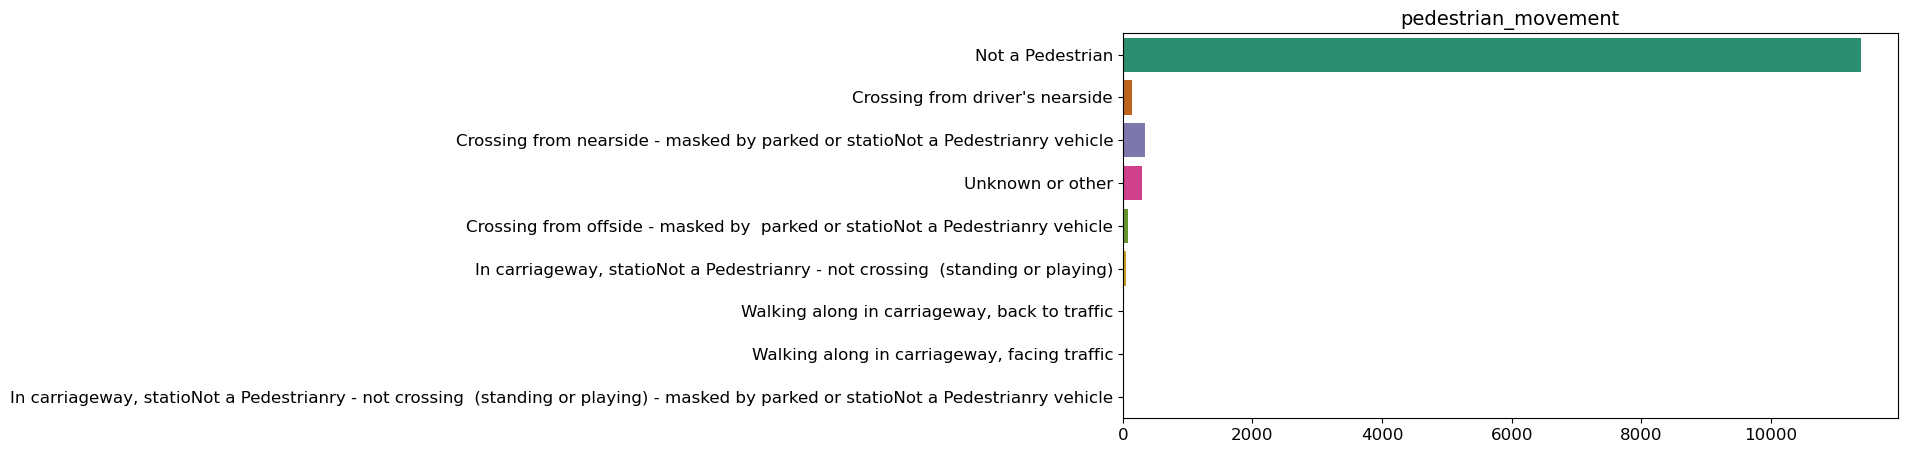

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='pedestrian_movement', palette='Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pedestrian_movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

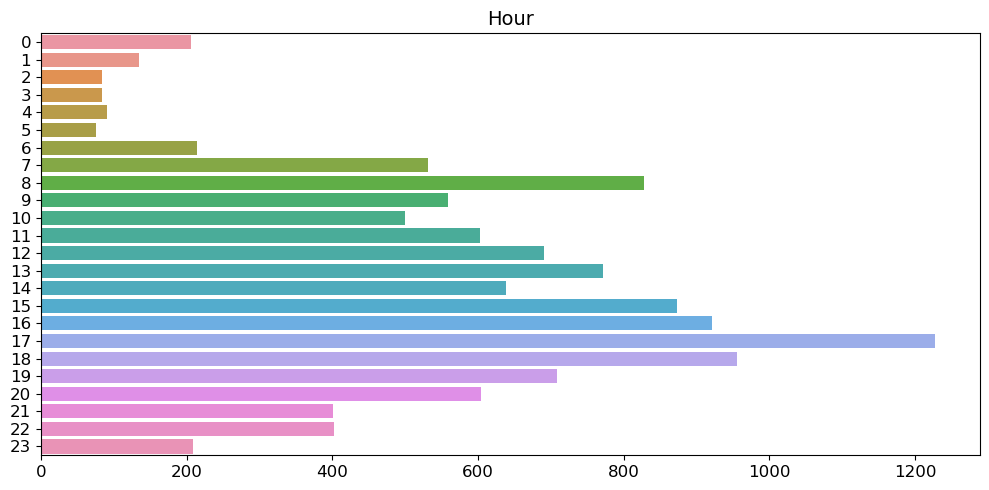

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

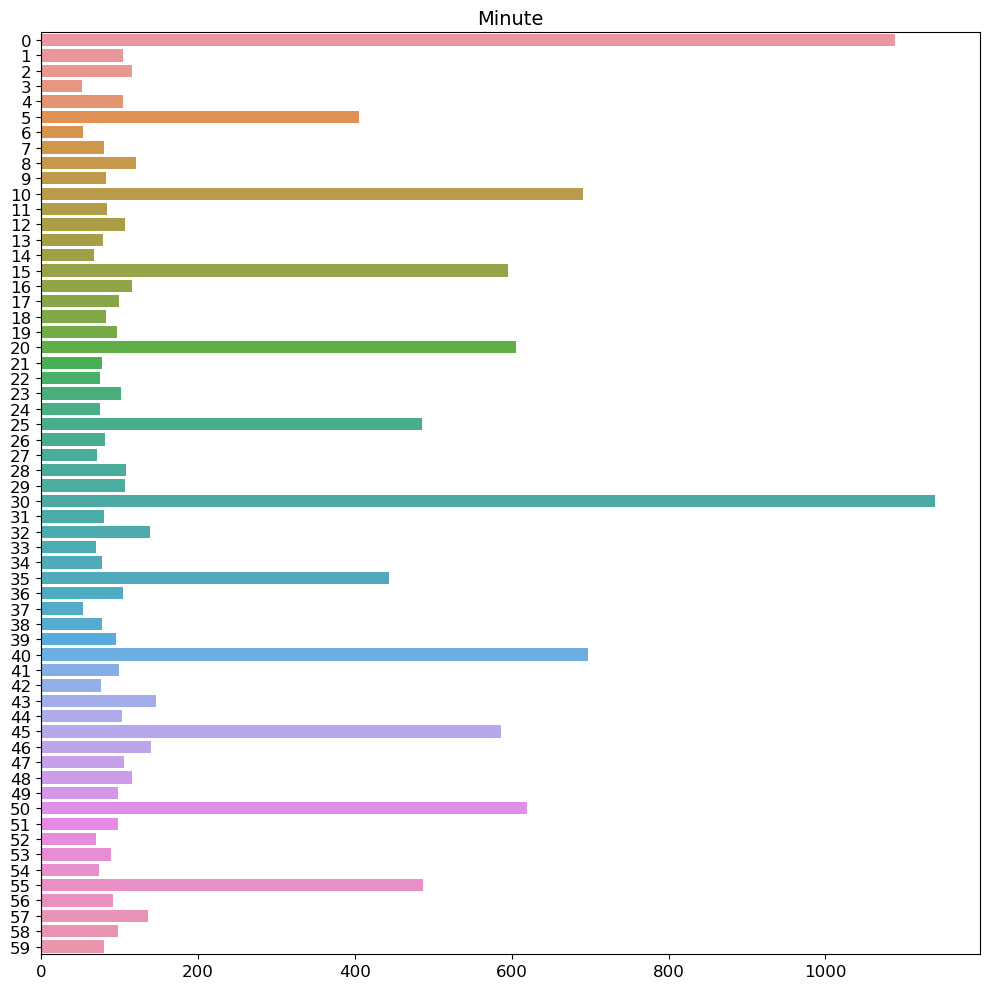

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(data=rta_data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [90]:
# changing minute columns value into group(1-5)
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

rta_data['minute'] = rta_data['minute'].apply(lambda x: convert_minutes(x))

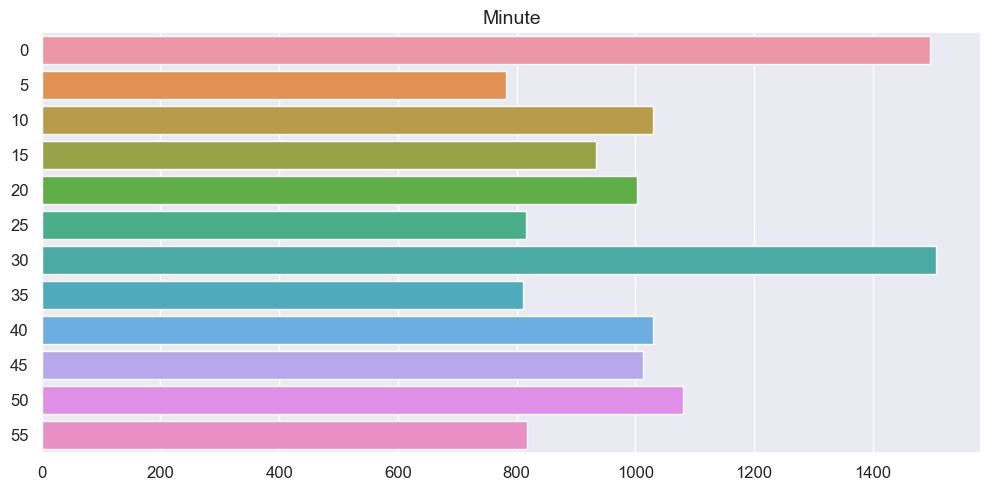

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

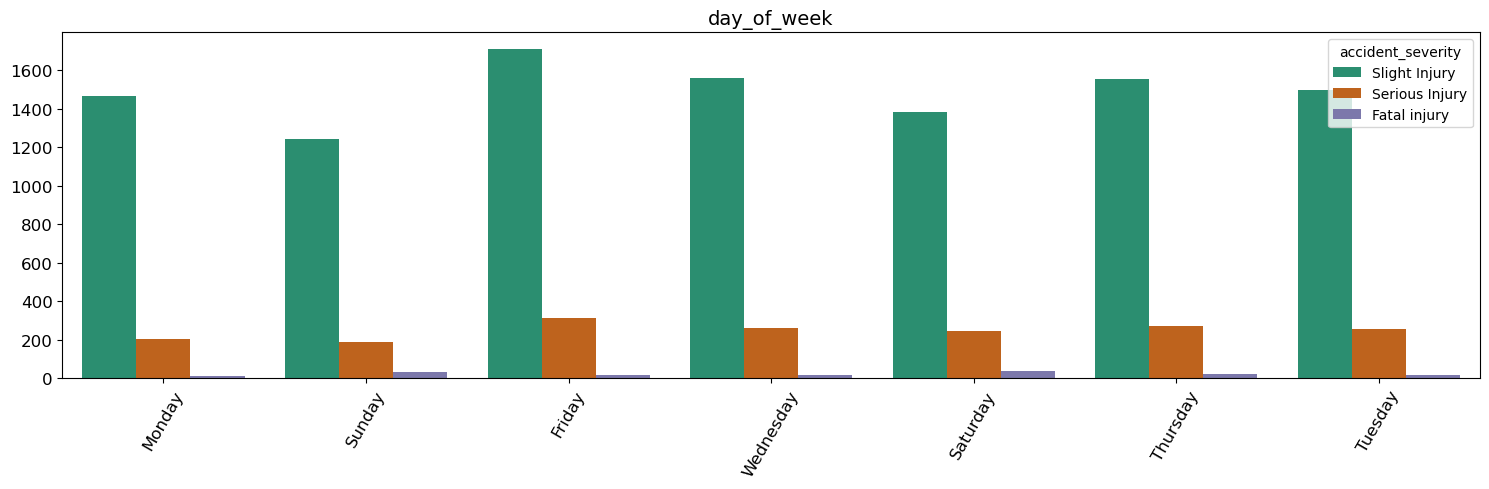

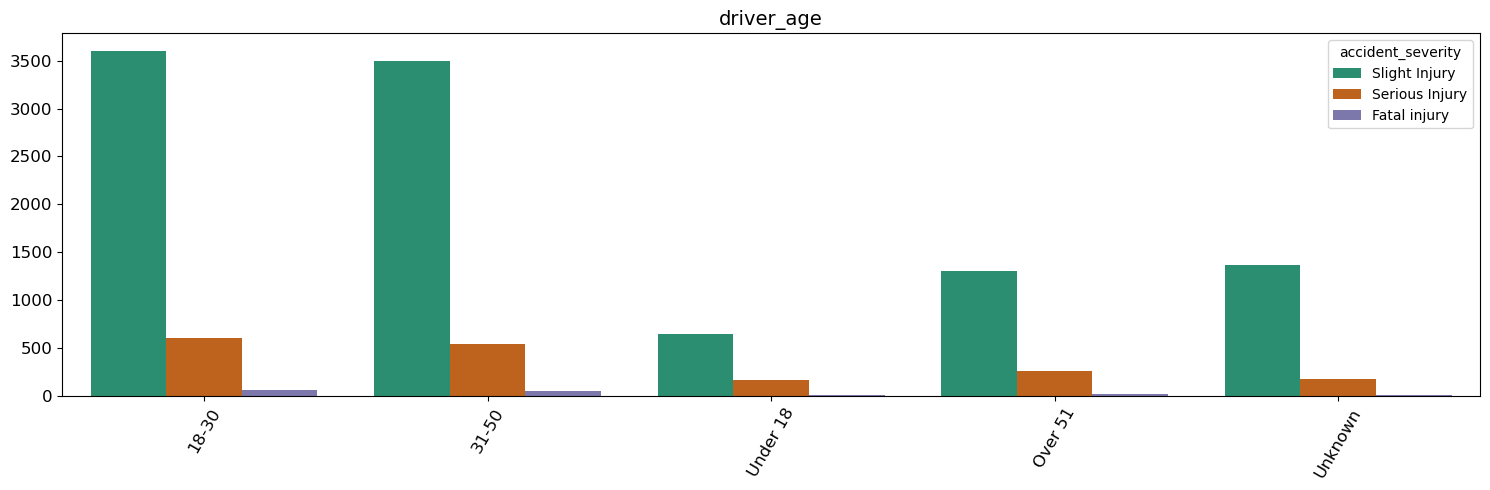

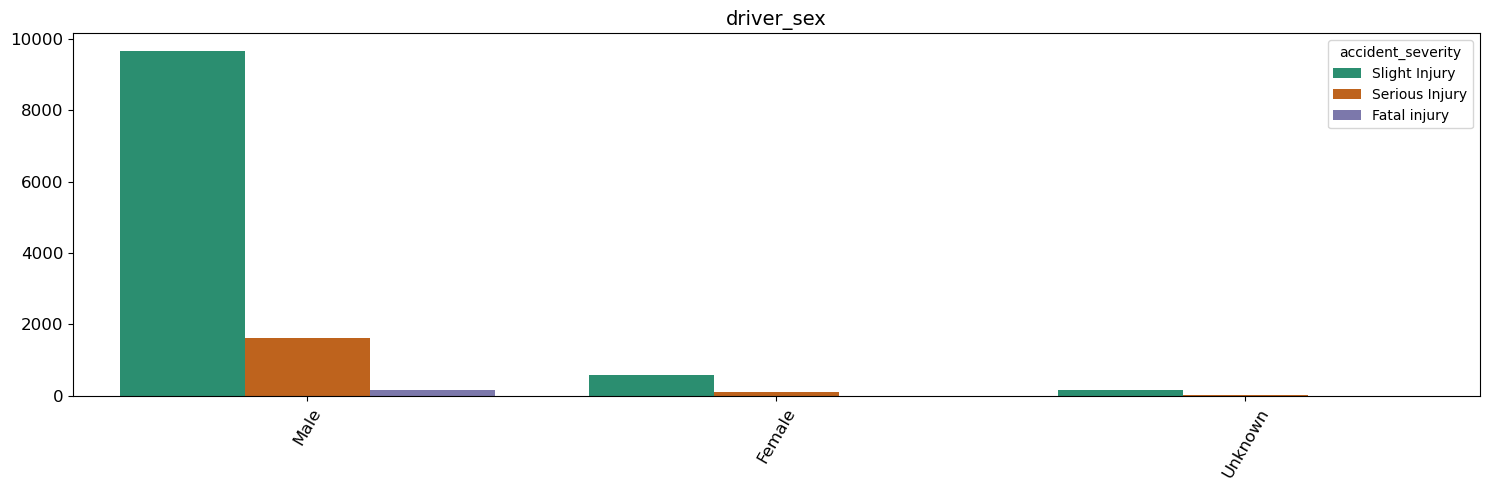

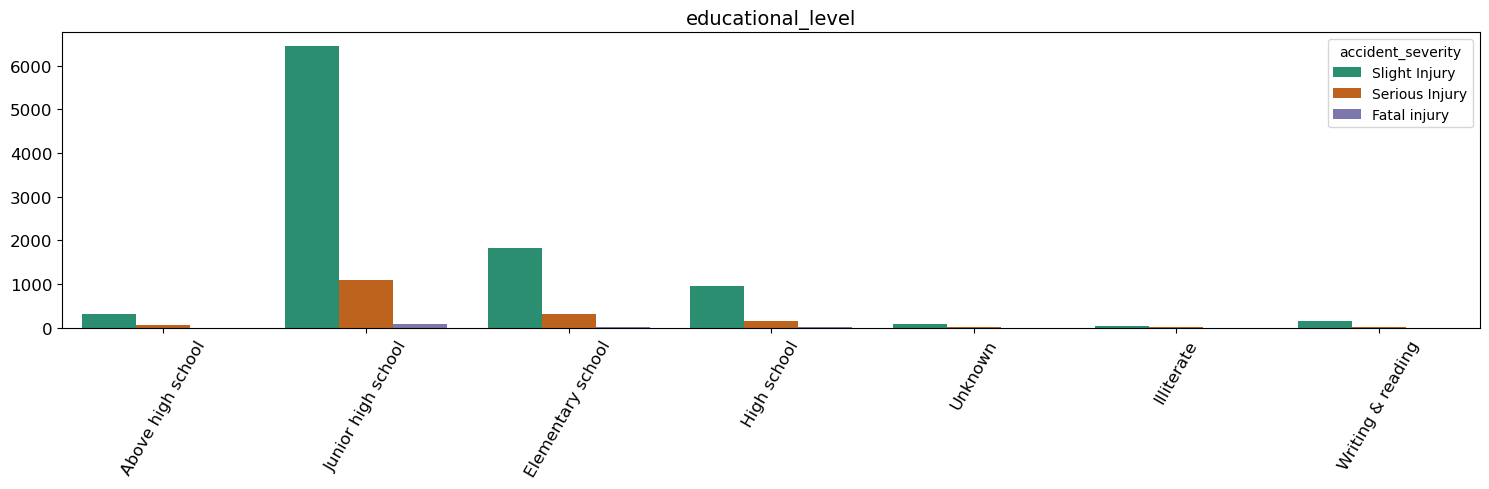

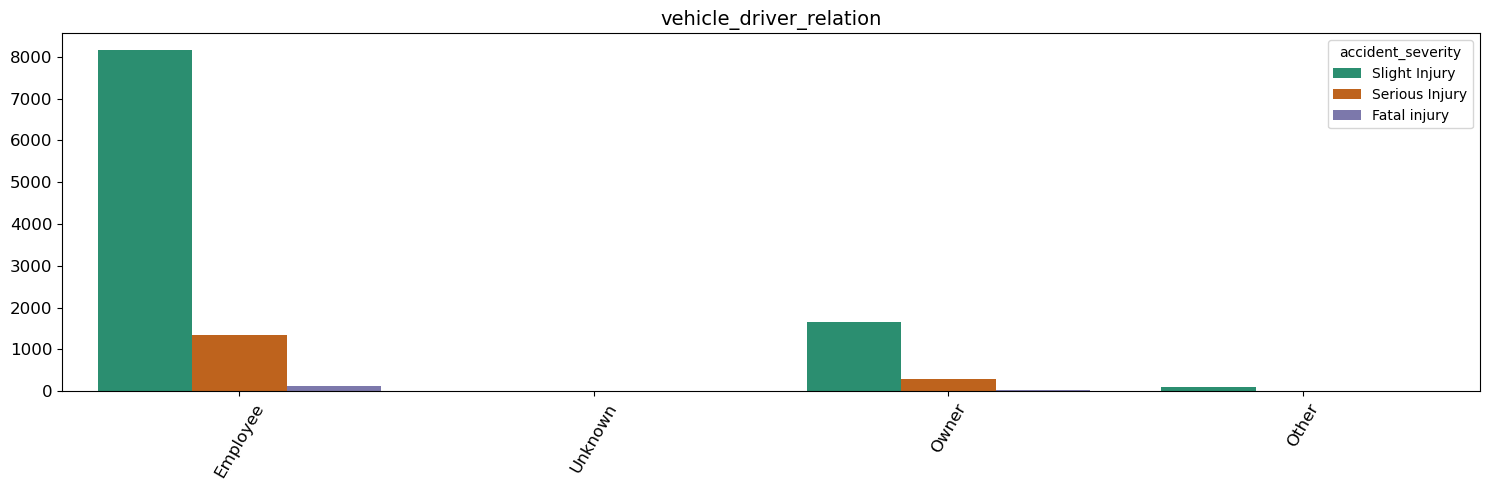

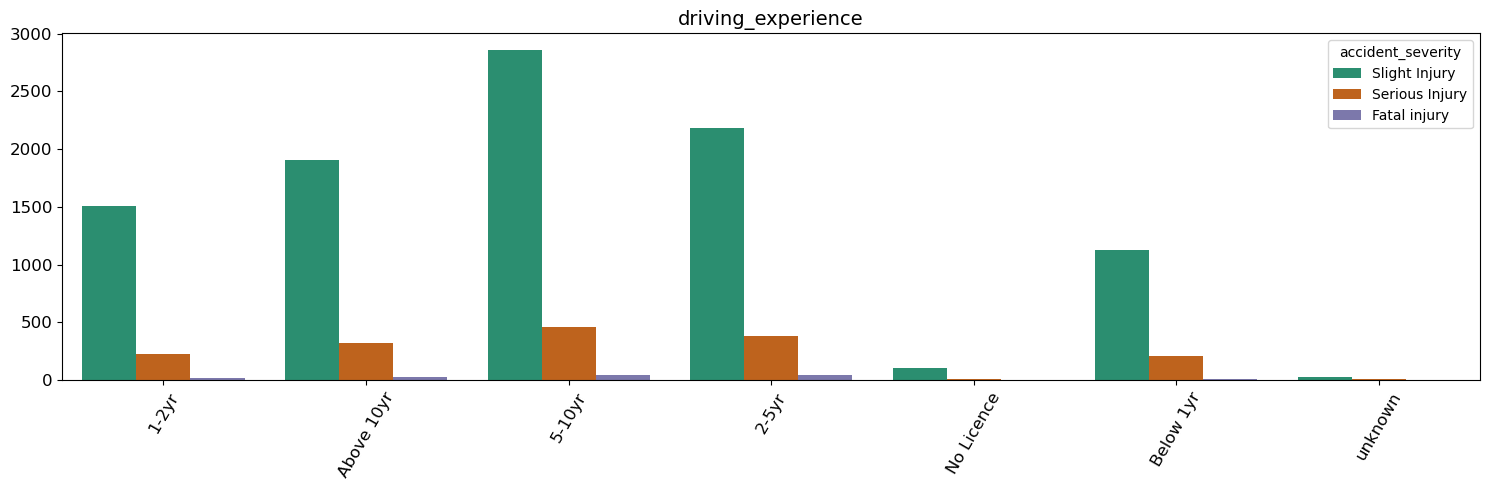

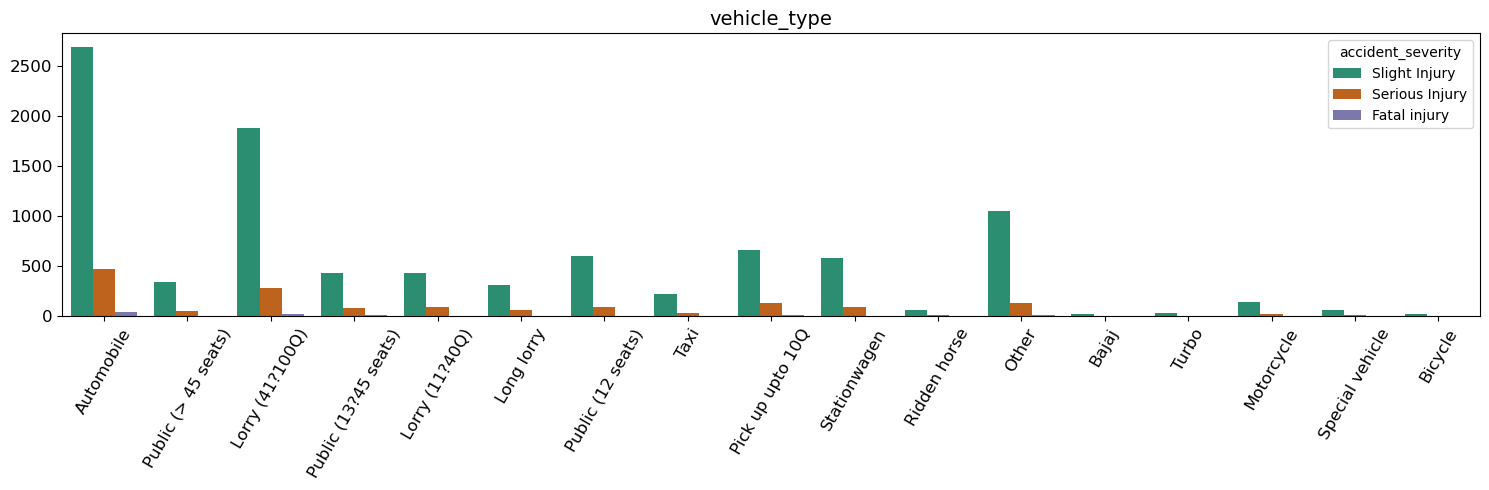

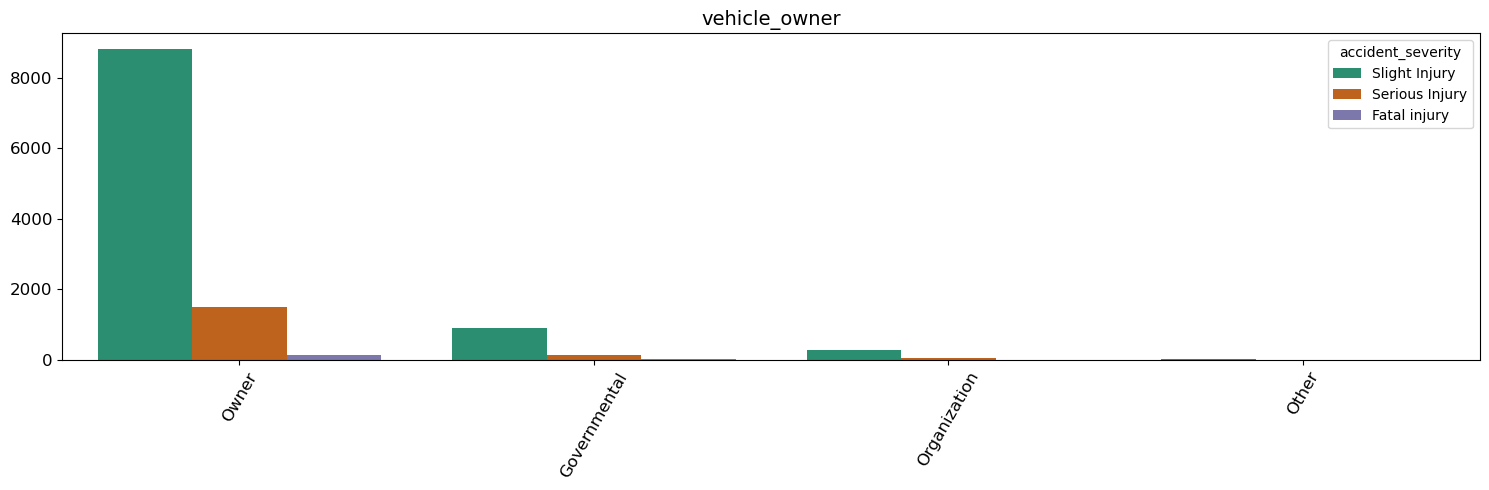

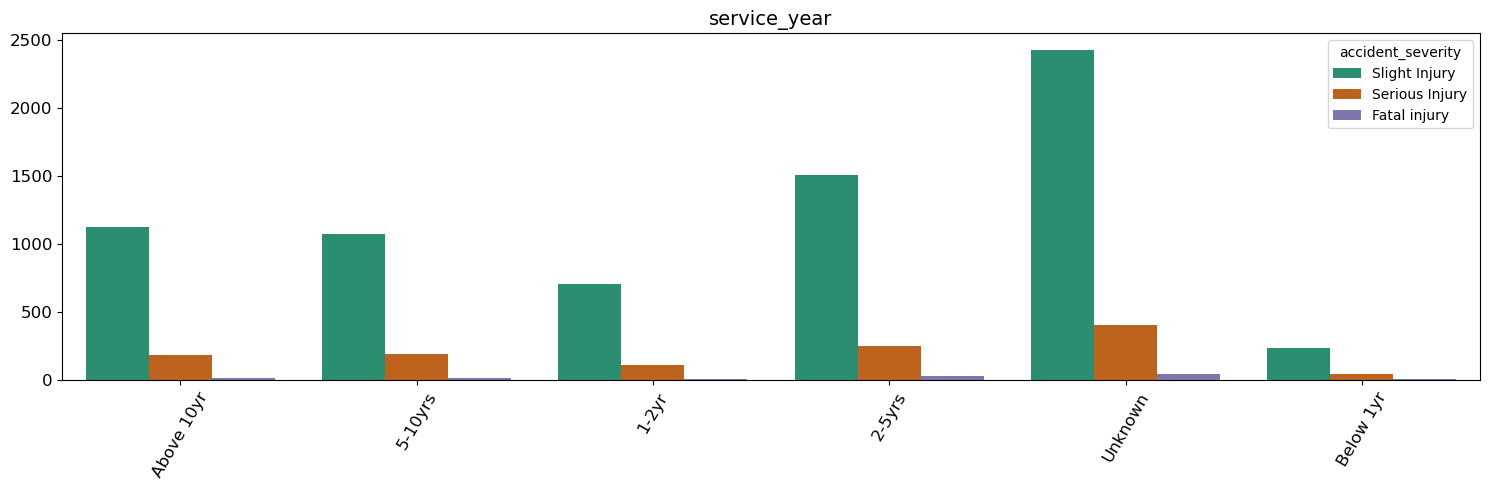

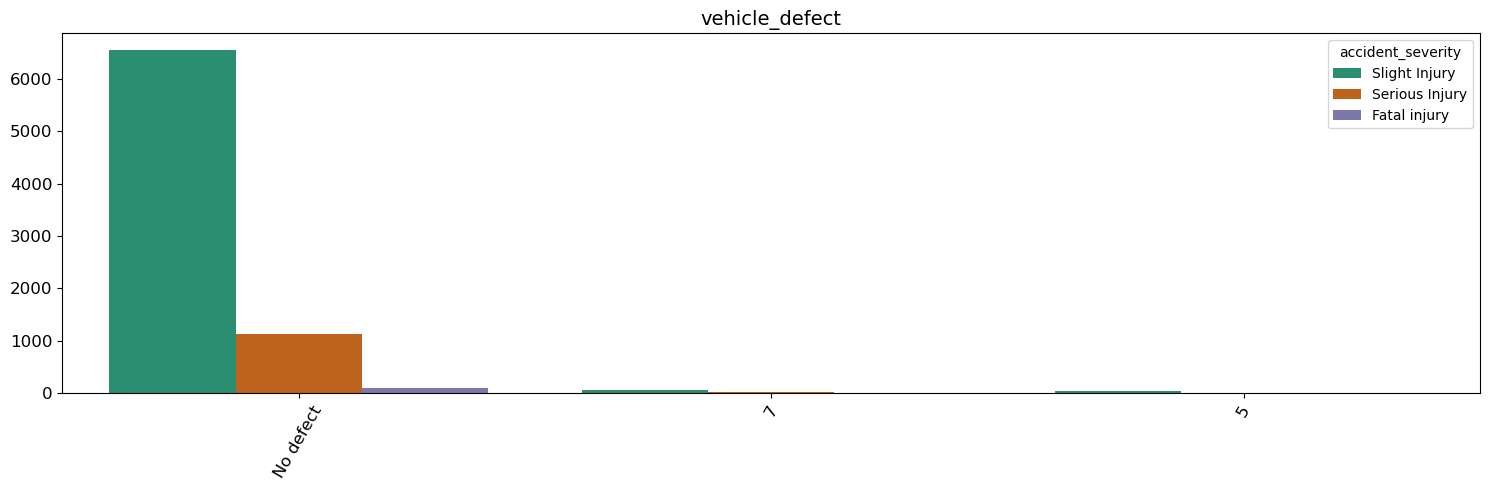

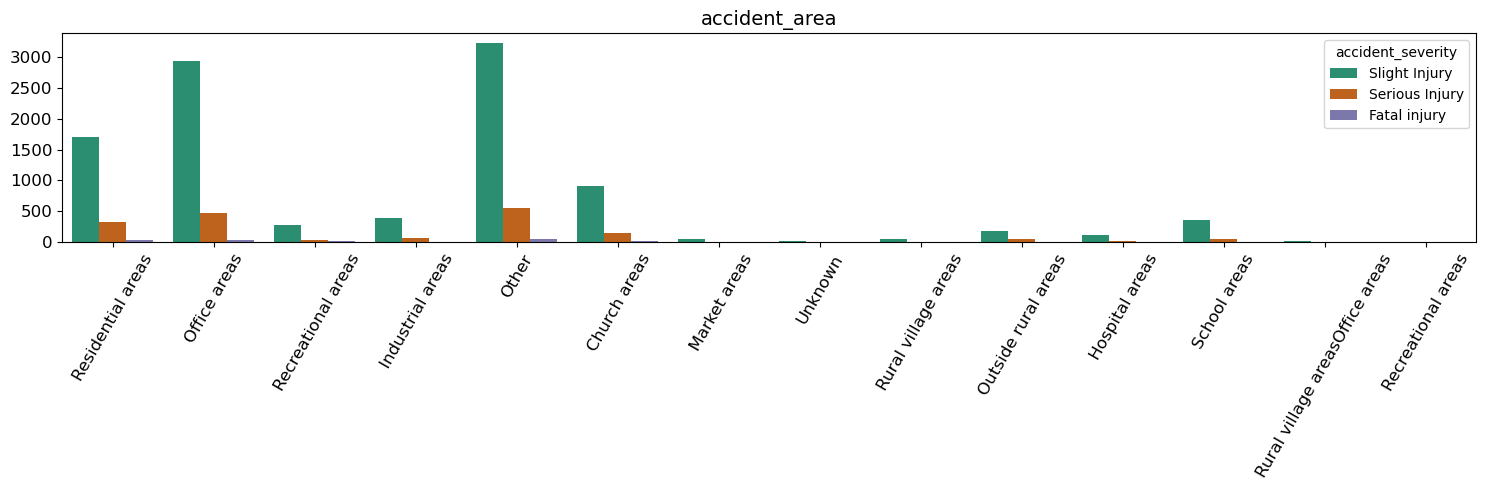

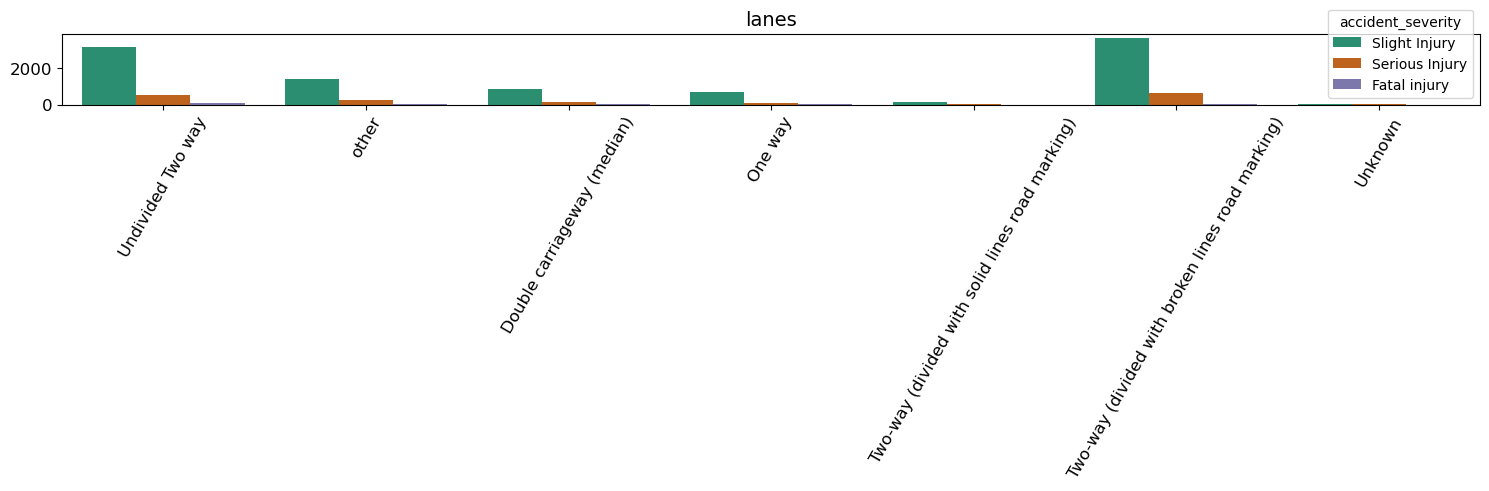

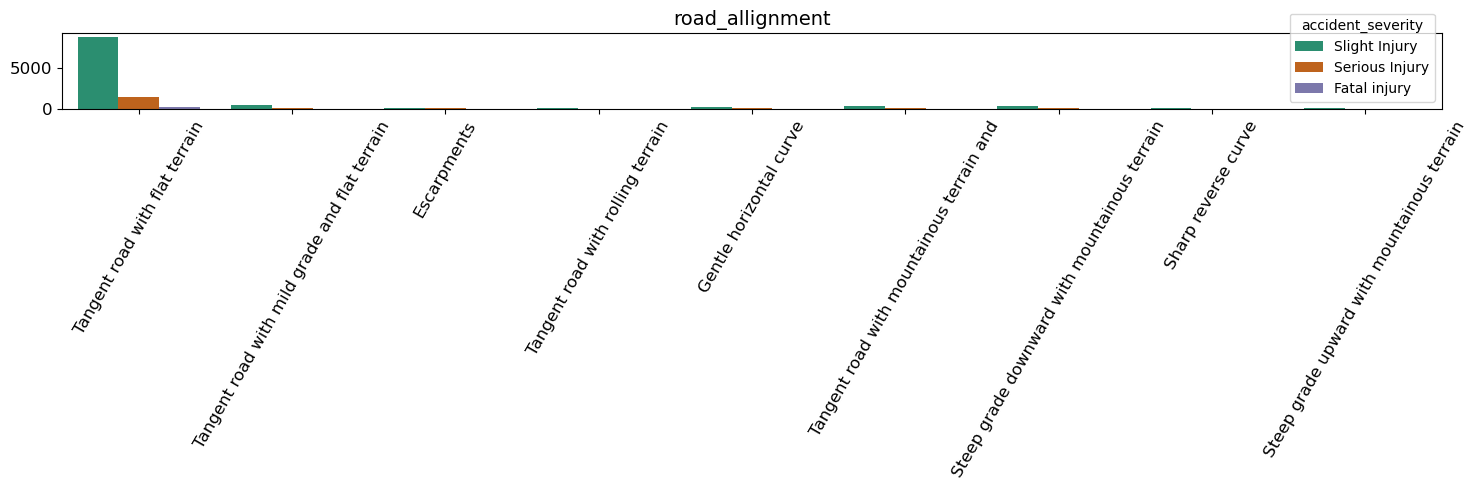

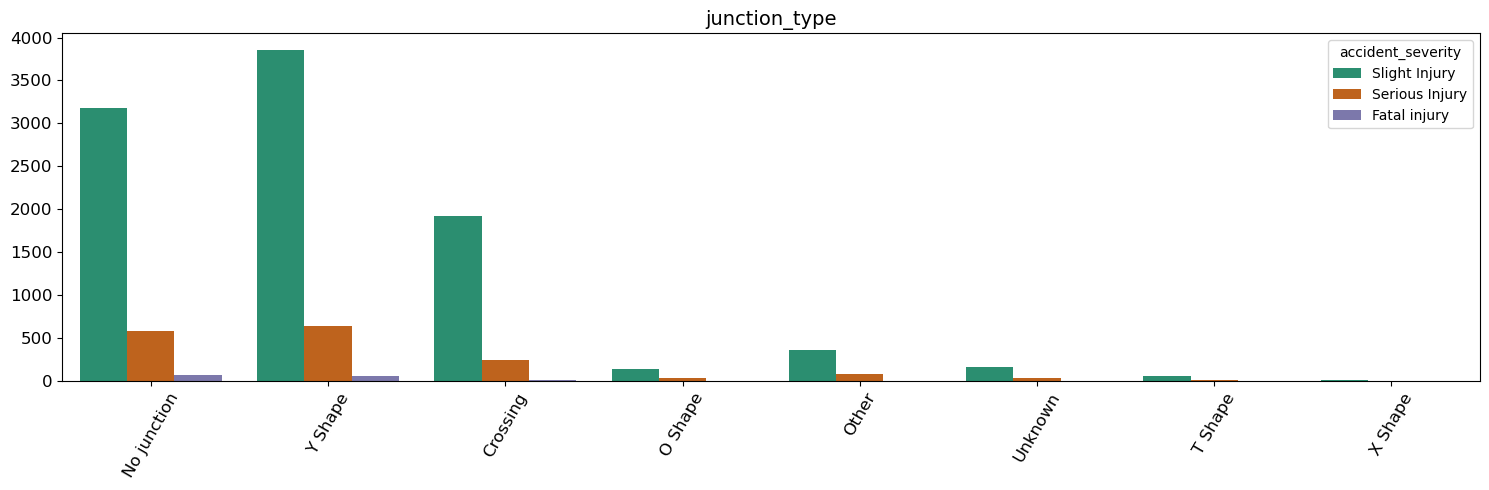

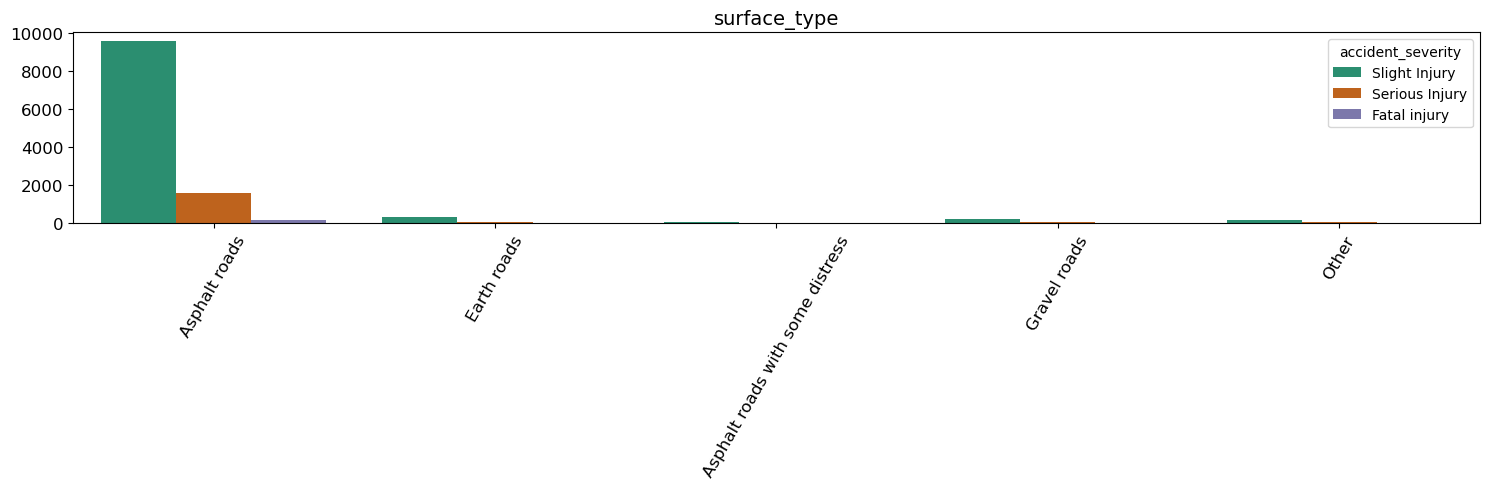

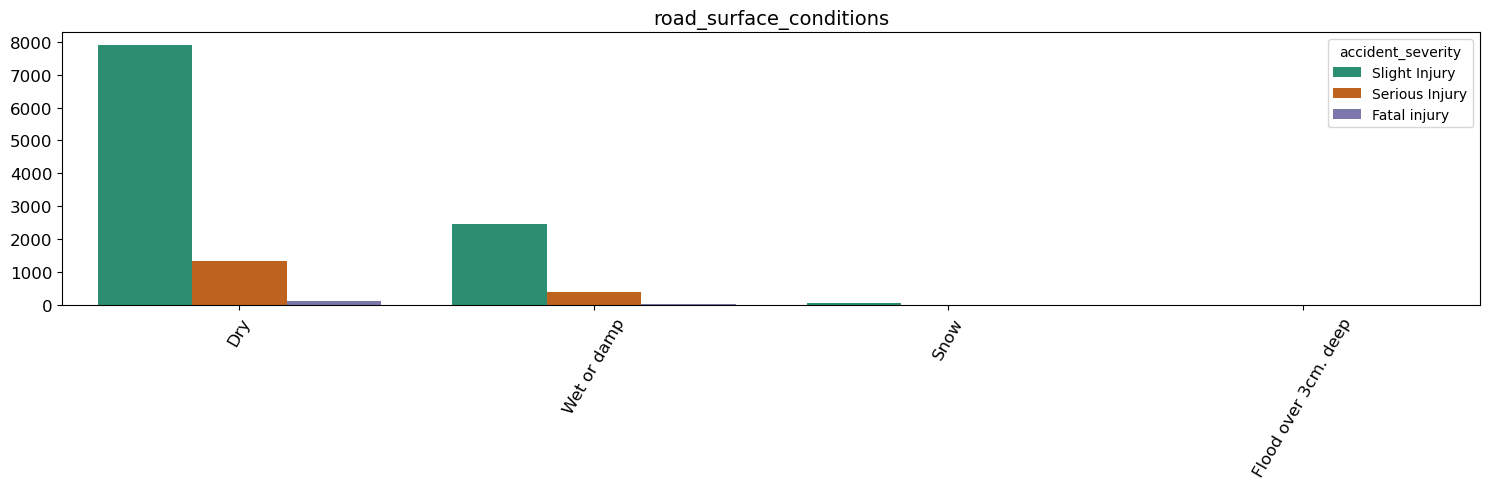

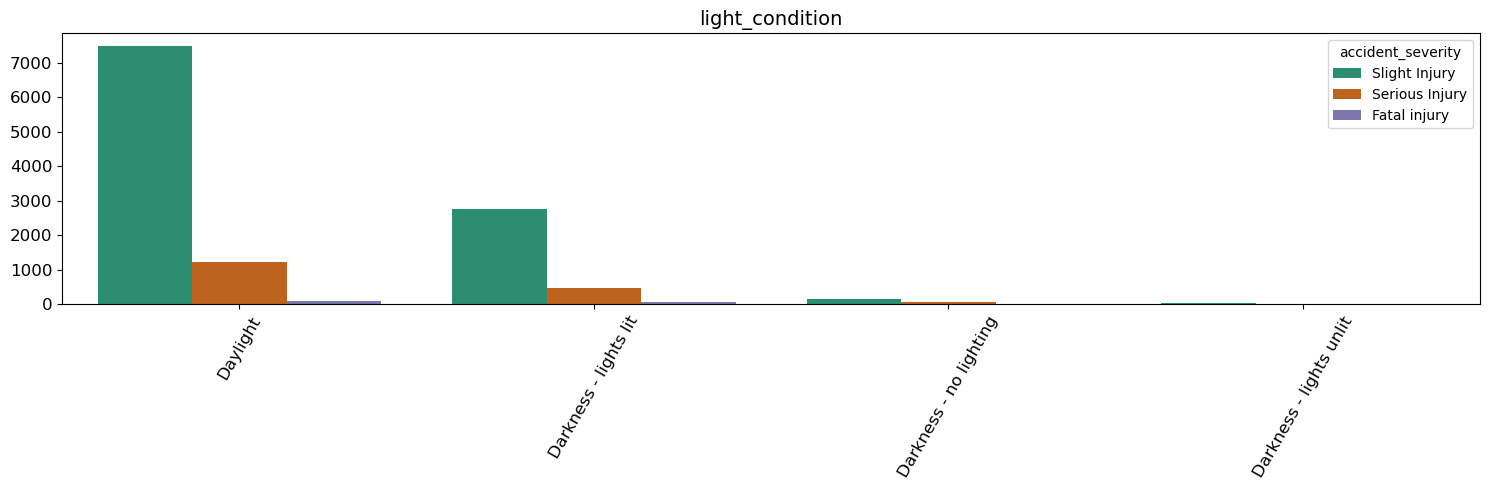

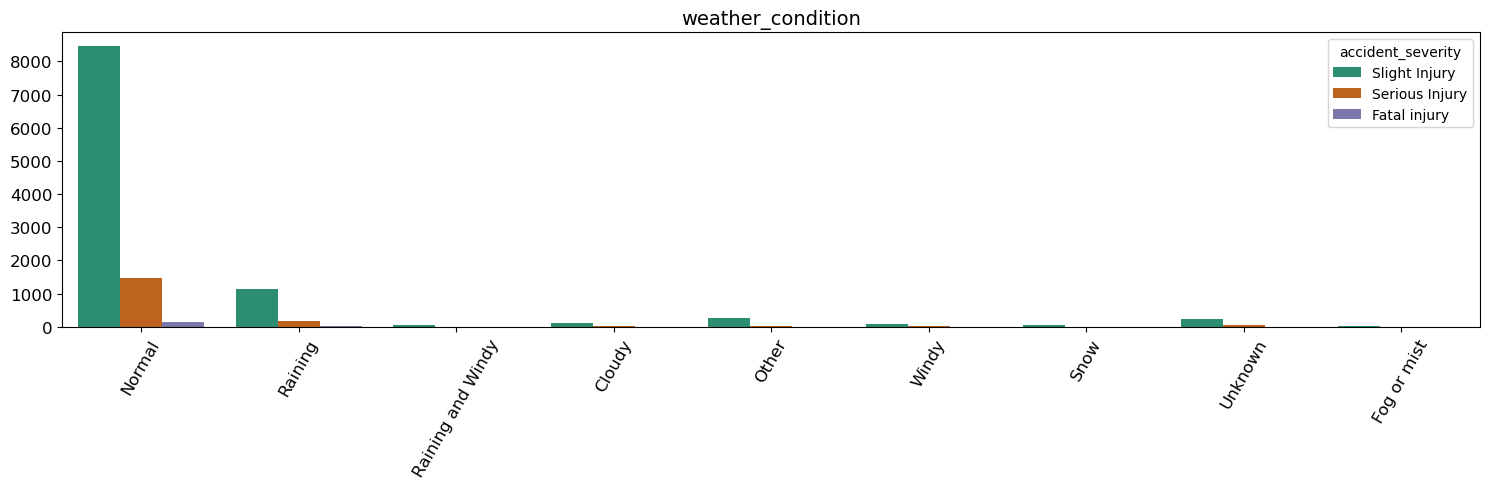

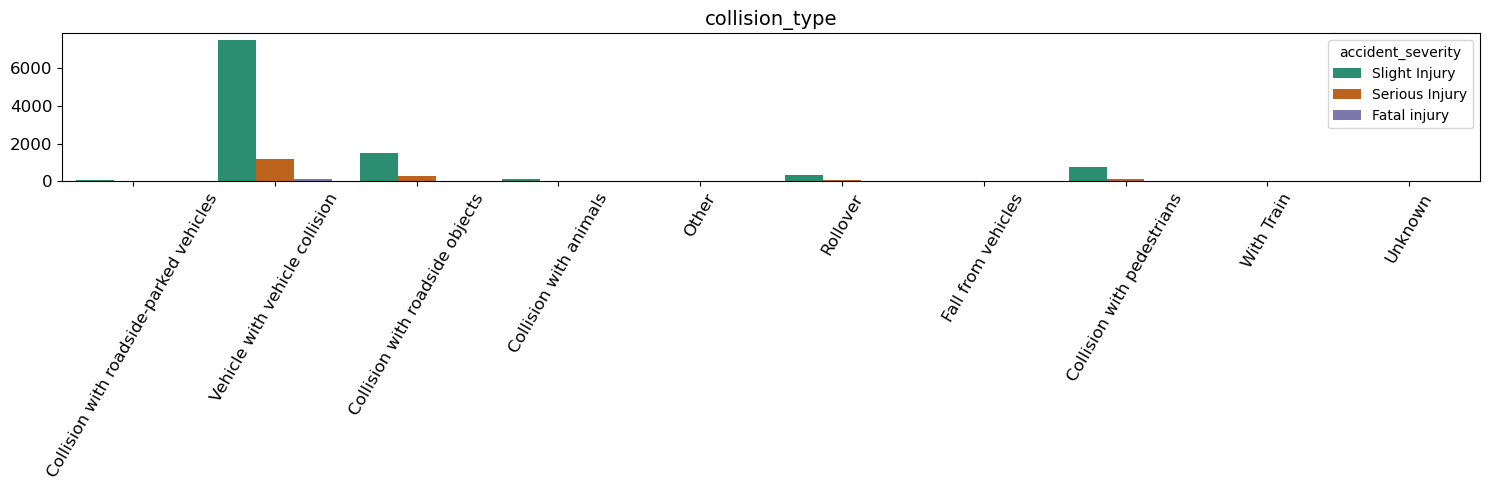

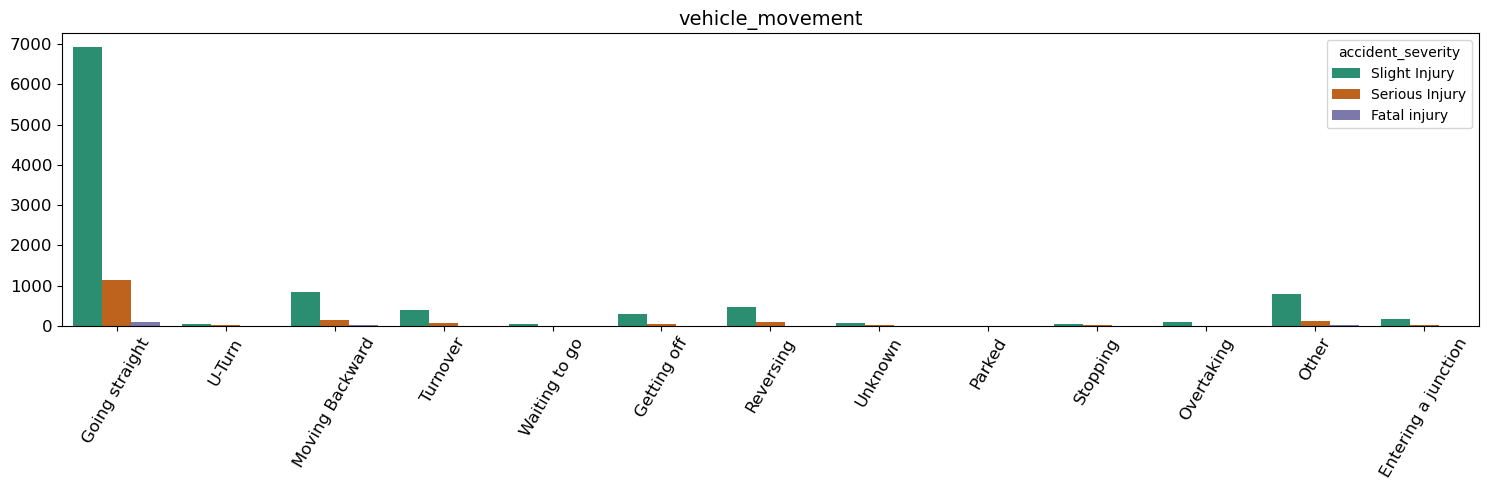

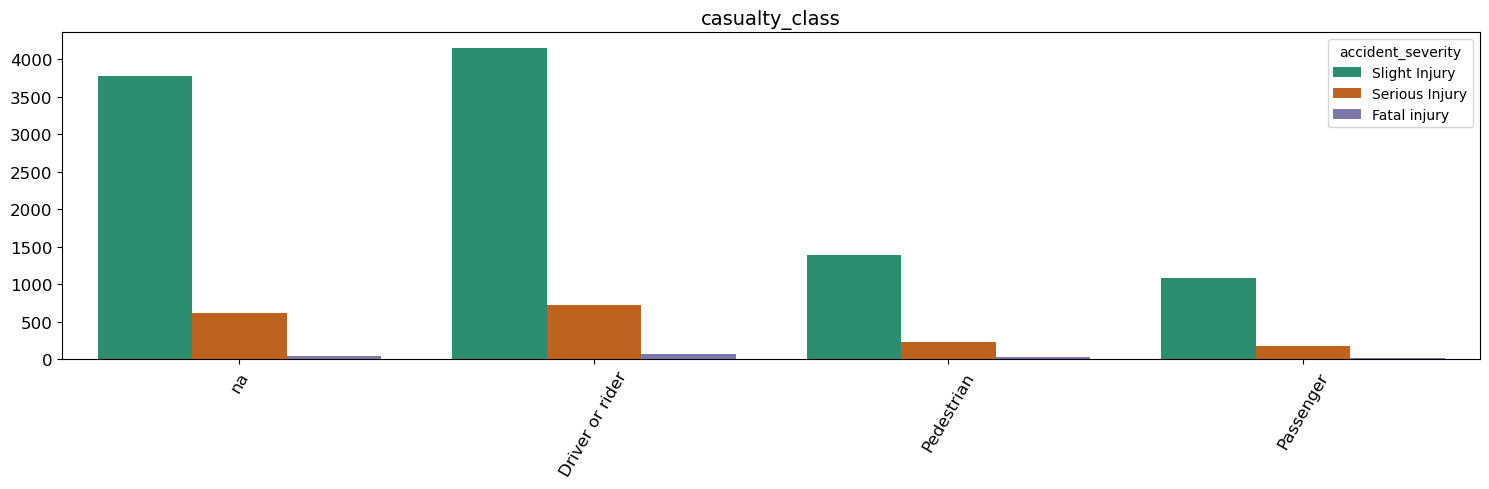

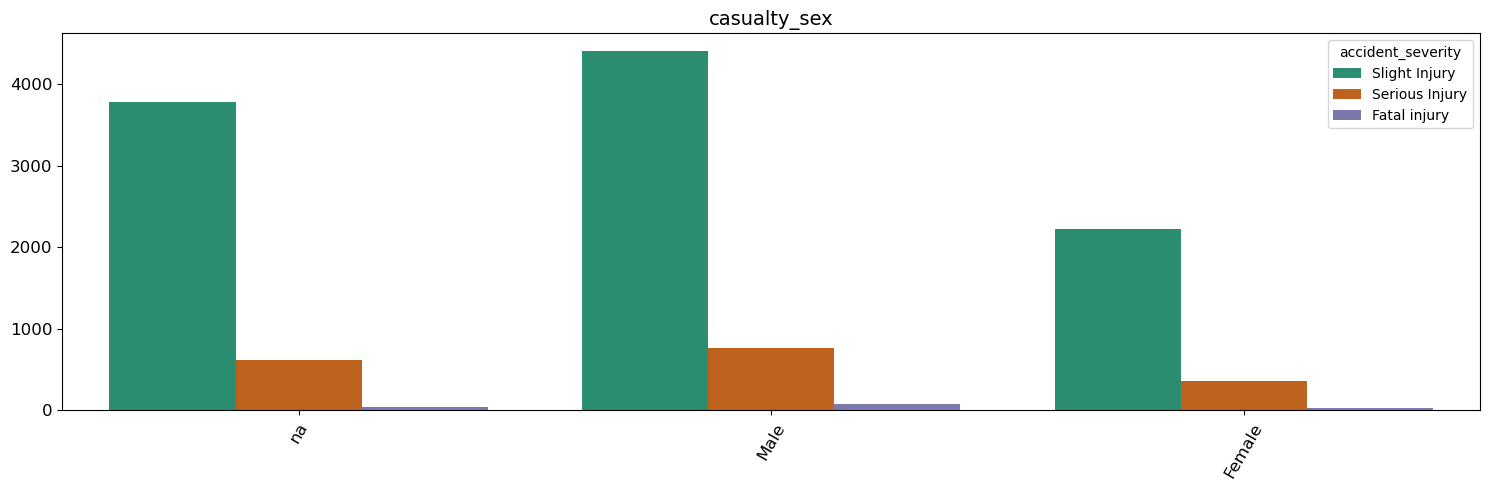

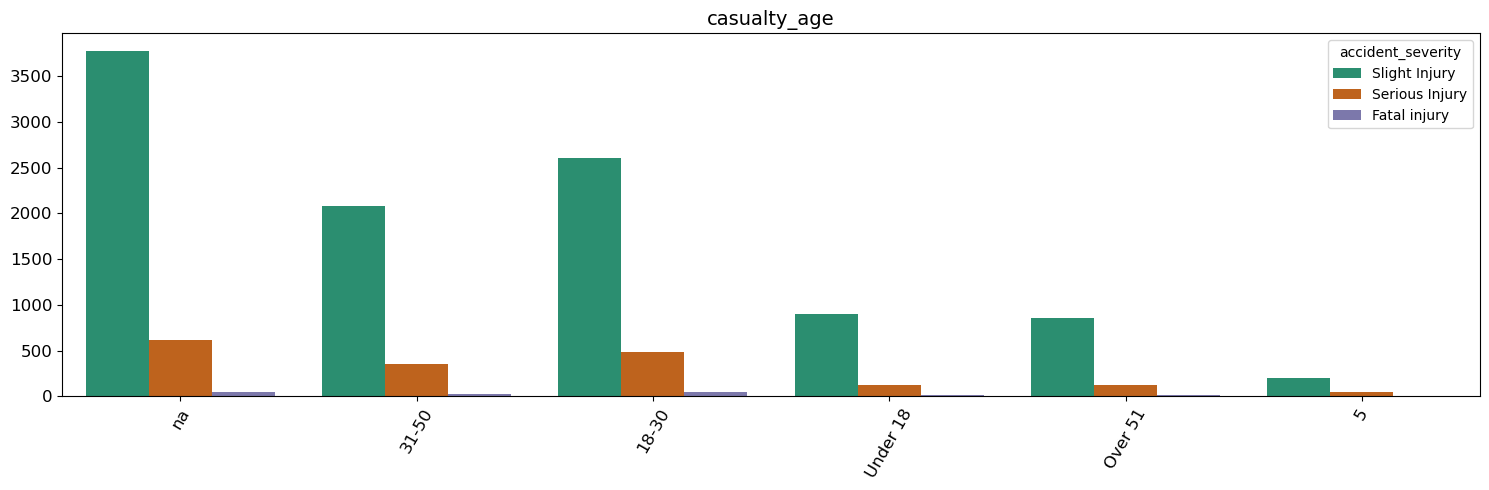

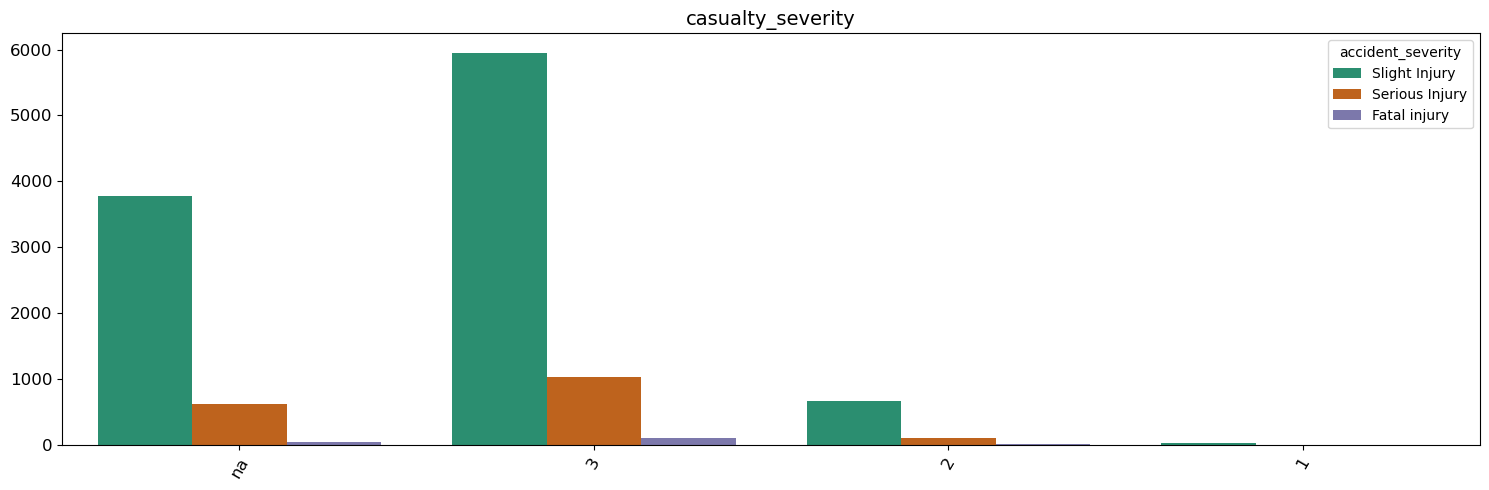

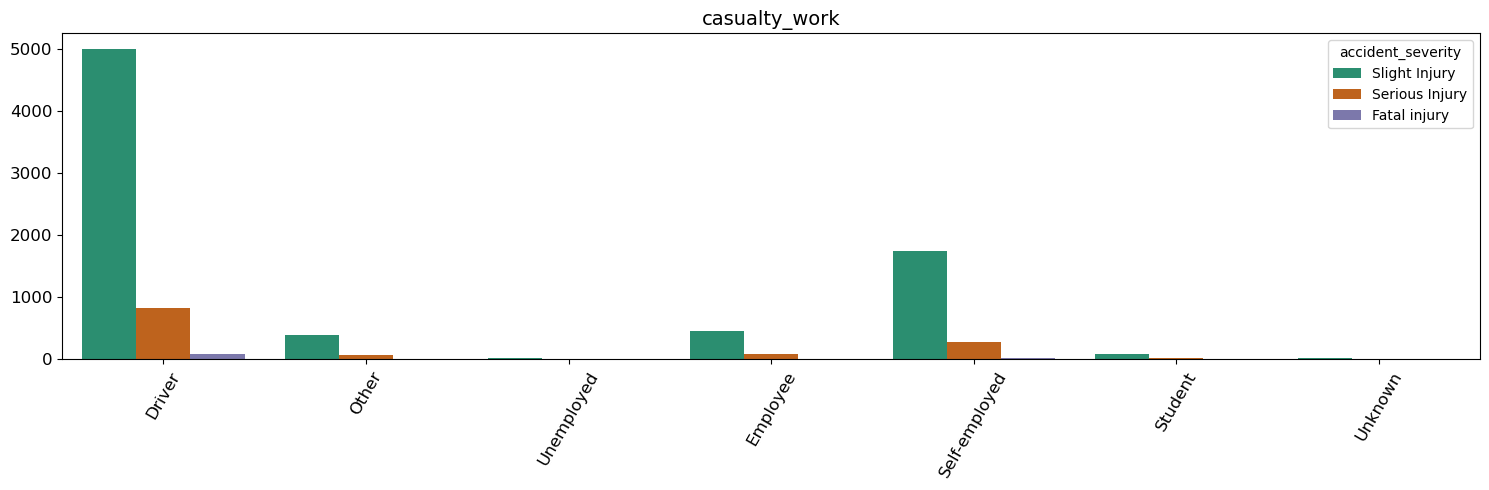

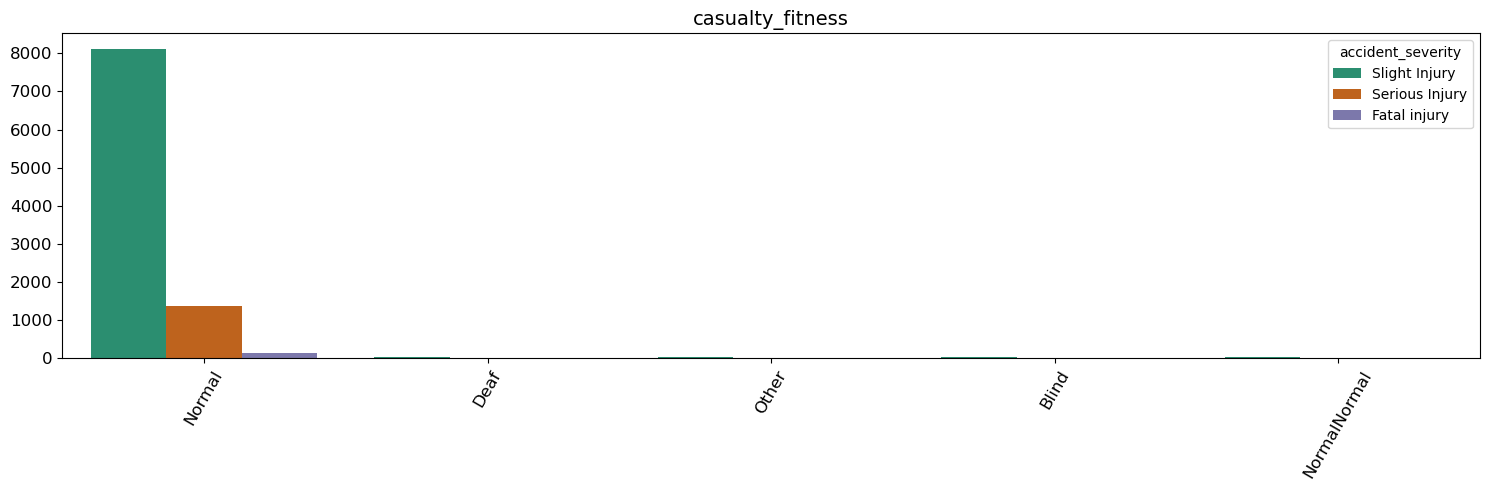

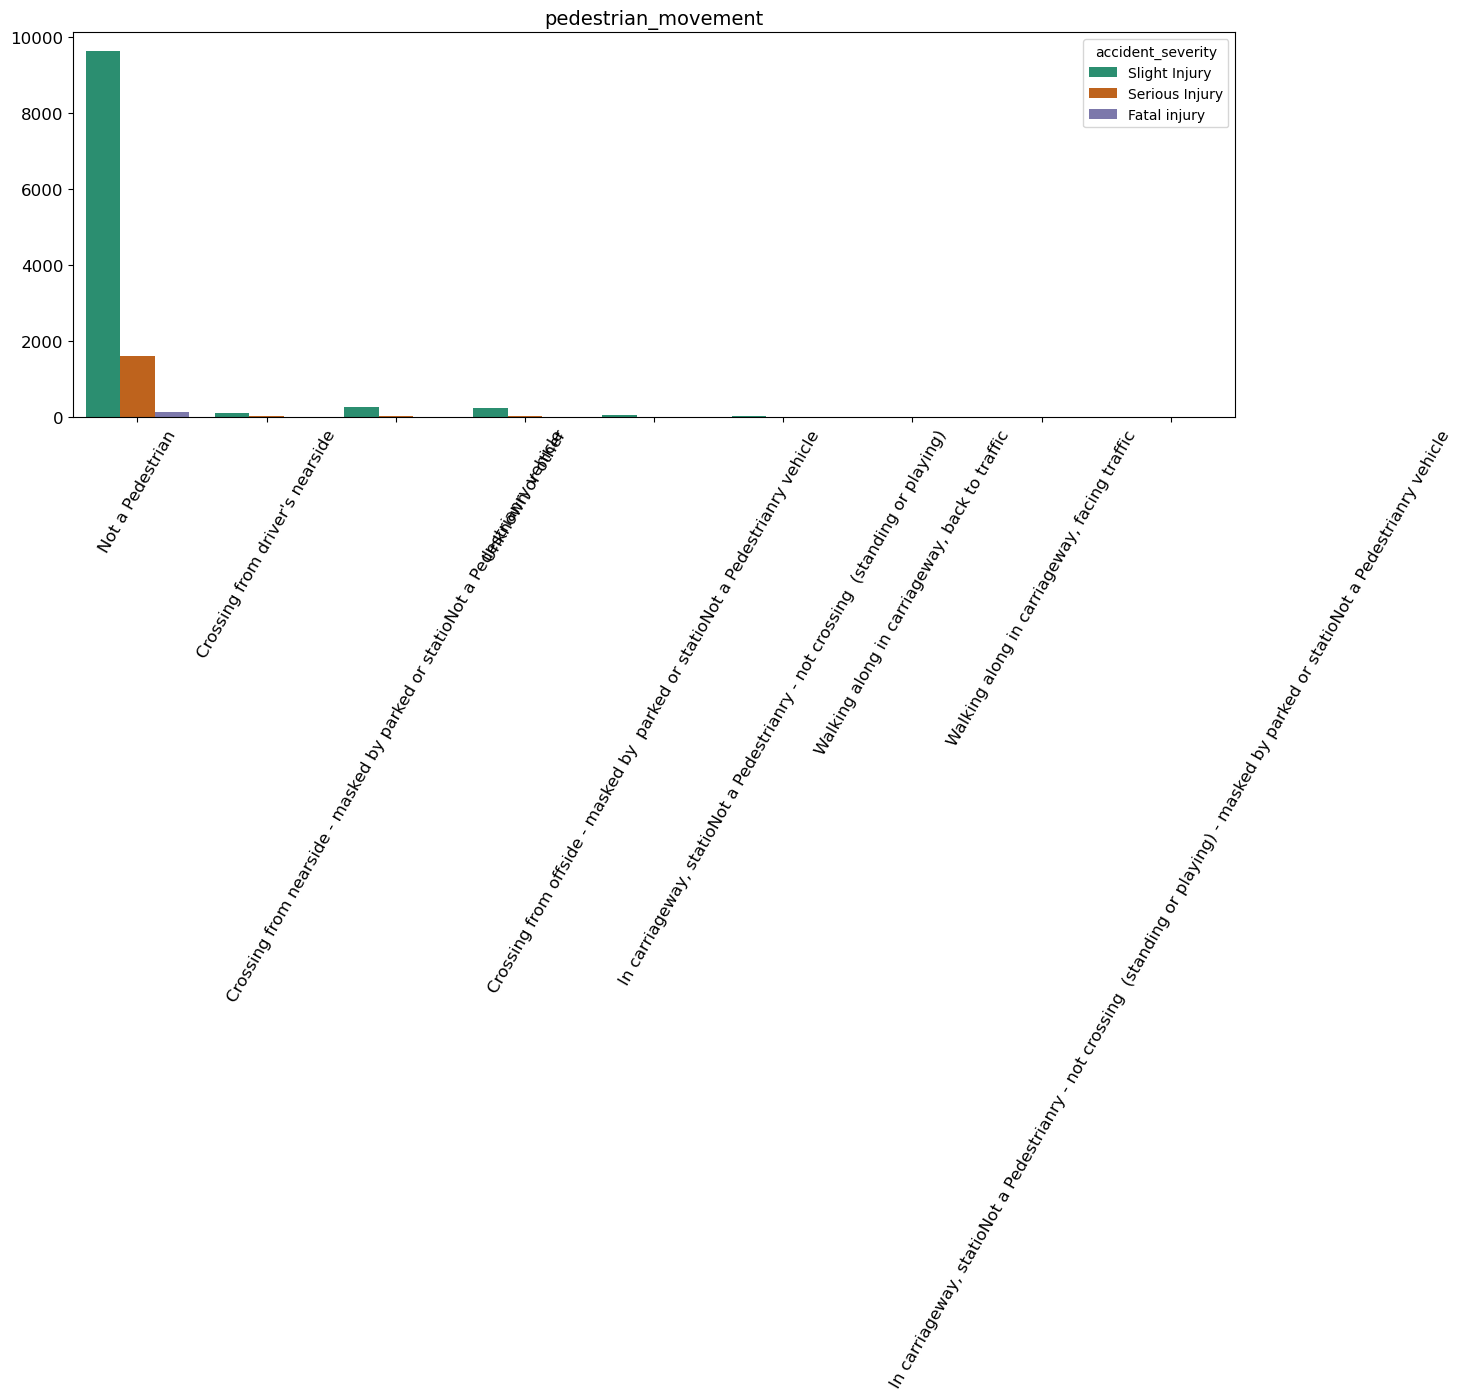

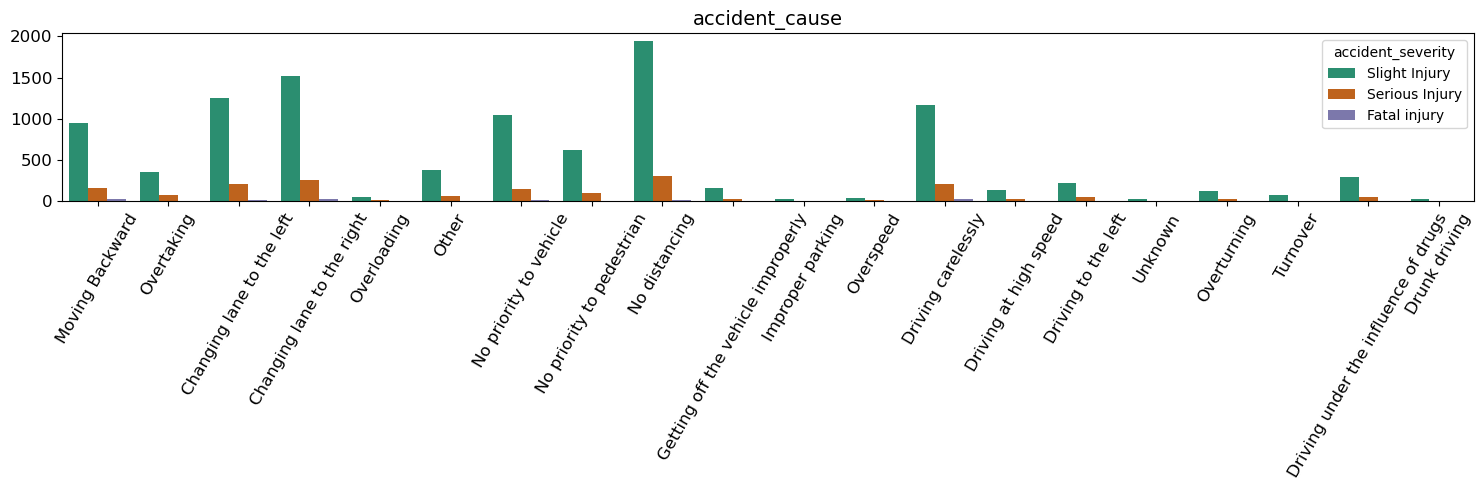

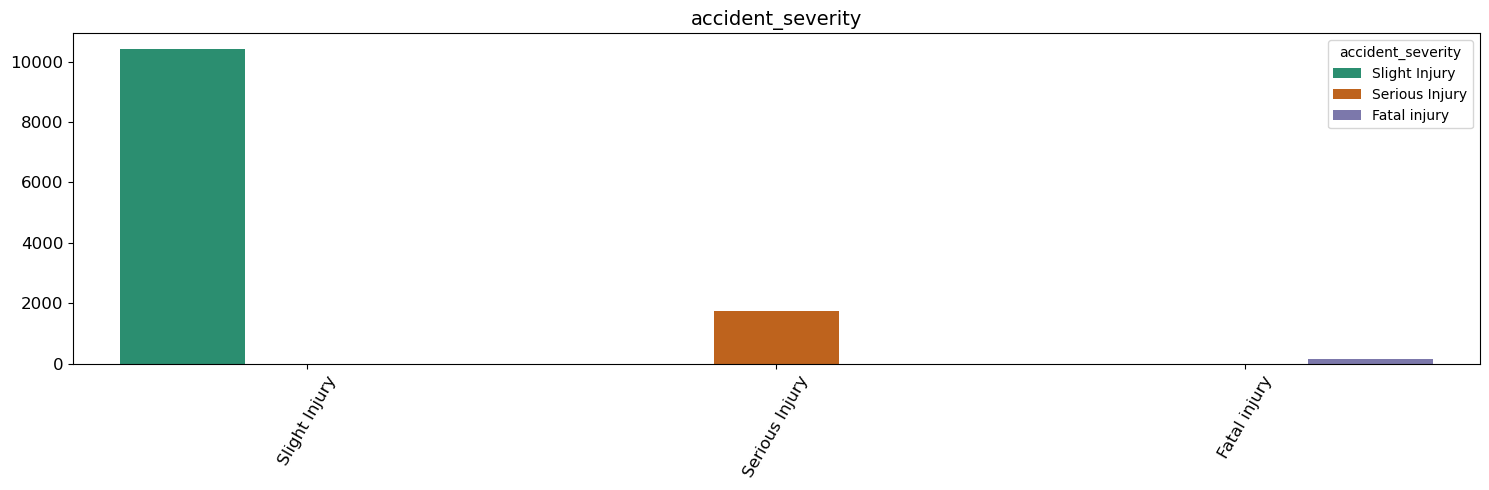

In [25]:
# data visualizationf of categorical cols
obj_cols = [col for col in rta_data.columns if rta_data[col].dtypes == 'object']


for col in obj_cols:
    
    # plot the figure of count plot
    plt.figure(figsize=(15,5))
    sns.countplot(x=col, hue='accident_severity', data=rta_data, palette='Dark2')
    plt.xticks(fontsize=12)
    plt.xticks(rotation=60)
    plt.yticks(fontsize=12)
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plotnumber += 1
    plt.tight_layout()
    

In [92]:
num_cols = rta_data.dtypes[rta_data.dtypes == 'int64'].index.tolist()
cat_cols = rta_data.dtypes[rta_data.dtypes != 'int64'].index.tolist()
rta_data[cat_cols]

day_of_week driver_age driver_sex   educational_level  \
0          Monday      18-30       Male   Above high school   
1          Monday      31-50       Male  Junior high school   
2          Monday      18-30       Male  Junior high school   
3          Sunday      18-30       Male  Junior high school   
4          Sunday      18-30       Male  Junior high school   
...           ...        ...        ...                 ...   
12311   Wednesday      31-50       Male                 NaN   
12312      Sunday    Unknown       Male   Elementary school   
12313      Sunday    Over 51       Male  Junior high school   
12314      Sunday      18-30     Female  Junior high school   
12315      Sunday      18-30       Male  Junior high school   

      vehicle_driver_relation driving_experience         vehicle_type  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      vehicle_owner service_year vehicle_defect  ... vehicle_movement  \
0             Owner   Above 10yr      No defect  ...   Going straight   
1             Owner      5-10yrs      No defect  ...   Going straight   
2             Owner          NaN      No defect  ...   Going straight   
3      Governmental          NaN      No defect  ...   Going straight   
4             Owner      5-10yrs      No defect  ...   Going straight   
...             ...          ...            ...  ...              ...   
12311         Owner          NaN      No defect  ...   Going straight   
12312         Owner          NaN      No defect  ...            Other   
12313         Owner       2-5yrs      No defect  ...            Other   
12314         Owner       2-5yrs      No defect  ...            Other   
12315         Owner       2-5yrs      No defect  ...         Stopping   

        casualty_class casualty_sex casualty_age casualty_severity  \
0                   na           na           na                na   
1                   na           na           na                na   
2      Driver or rider         Male        31-50                 3   
3           Pedestrian       Female        18-30                 3   
4                   na           na           na                na   
...                ...          ...          ...               ...   
12311               na           na           na                na   
12312               na           na           na                na   
12313  Driver or rider         Male        31-50                 3   
12314               na           na           na                na   
12315       Pedestrian       Female            5                 3   

      casualty_work casualty_fitness  \
0               NaN              NaN   
1               NaN              NaN   
2            Driver              NaN   
3            Driver           Normal   
4               NaN              NaN   
...             ...              ...   
12311        Driver           Normal   
12312        Driver           Normal   
12313        Driver           Normal   
12314        Driver           Normal   
12315        Driver           Normal   

                                     pedestrian_movement  \
0                                       Not a Pedestrian   
1                                       Not a Pedestr

In [93]:
# finding correlation between numberical data
corr = rta_data.corr()
corr

vehicles_involved  casualties      hour    minute
vehicles_involved           1.000000    0.213427  0.023095  0.002533
casualties                  0.213427    1.000000  0.051761  0.008402
hour                        0.023095    0.051761  1.000000 -0.024949
minute                      0.002533    0.008402 -0.024949  1.000000

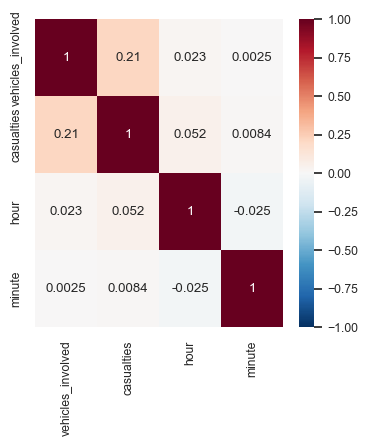

In [94]:
plt.figure(figsize=(4,4))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()


## Data pre-processing

In [95]:
rta_data.isnull().sum()[rta_data.isnull().sum() != 0]

educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
collision_type              155
vehicle_movement            308
casualty_work              3198
casualty_fitness           2635
dtype: int64

In [96]:
# dropping columns that can cause imbalance while imputation
rta_data.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [97]:
# replacing the null value from mode 
nan_cols = [x for x in rta_data.isna().sum()[rta_data.isna().sum() != 0].index.tolist()]
for n in nan_cols:
    mode = rta_data[n].mode()[0]
    rta_data[n].fillna(mode, inplace=True)

In [98]:
rta_data.isnull().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

## Encoding

In [99]:
rta_data.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'driving_experience', 'vehicle_type', 'vehicle_owner', 'service_year',
       'accident_area', 'lanes', 'road_allignment', 'junction_type',
       'surface_type', 'road_surface_conditions', 'light_condition',
       'weather_condition', 'collision_type', 'vehicles_involved',
       'casualties', 'vehicle_movement', 'casualty_class', 'casualty_sex',
       'casualty_age', 'casualty_severity', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour', 'minute'],
      dtype='object')

In [100]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

rta_data = ordinal_encoder(rta_data, rta_data.drop(['accident_severity'], axis=1).columns)
rta_data.shape

(12316, 29)

In [101]:
rta_data

day_of_week  driver_age  driver_sex  educational_level  \
0                2           1           2                  1   
1                2           2           2                  5   
2                2           1           2                  5   
3                4           1           2                  5   
4                4           1           2                  5   
...            ...         ...         ...                ...   
12311            7           2           2                  5   
12312            4           5           2                  2   
12313            4           3           2                  5   
12314            4           1           1                  5   
12315            4           1           2                  5   

       driving_experience  vehicle_type  vehicle_owner  service_year  \
0                       1             1              4             4   
1                       4            12              4             3   
2                       1             6              4             6   
3                       3            12              1             6   
4                       2             1              4             3   
...                   ...           ...            ...           ...   
12311                   2             5              4             6   
12312                   3             1              4             6   
12313                   3             2              4             2   
12314                   4             6              4             2   
12315                   3             8              4             2   

       accident_area  lanes  ...  vehicle_movement  casualty_class  \
0                 10      3  ...                 3               4   
1                  7      5  ...                 3               4   
2                  2      7  ...                 3               1   
3                  7      7  ...                 3               3   
4                  5      7  ...                 3               4   
...              ...    ...  ...               ...             ...   
12311              6      5  ...                 3               4   
12312              6      3  ...                 5               4   
12313              6      3  ...                 5               1   
12314              7      5  ...                 5               4   
12315              6      5  ...                 9               3   

       casualty_sex  casualty_age  casualty_severity  pedestrian_movement  \
0                 3             6                  4                    6   
1                 3             6                  4                    6   
2                 2             2                  3                    6   
3                 1             1                  3                    6   
4                 3             6                  4                    6   
...             ...           ...                ...                  ...   
12311             3             6                  4                    6   
12312             3             6                  4                    6   
12313             2             2                  3                    6   
12314             3             6                  4                    6   
12315             1             3                  3                    2   

       accident_cause  accident_severity  hour  minute  
0                  10      Slight Injury    18       2  
1                  17      Slight Injury    18       2  
2                   1     Serious Injury    18       2  
3                   2      Slight Injury     2       3  
4                  17      Slight Injury     2       3  
...               ...                ...   ...     ...  
12311              11      Slight Injury    17       4  
12312              11      Slight Injury    19       1  
12313               2     Serious Injury    14      12  
12314               6    

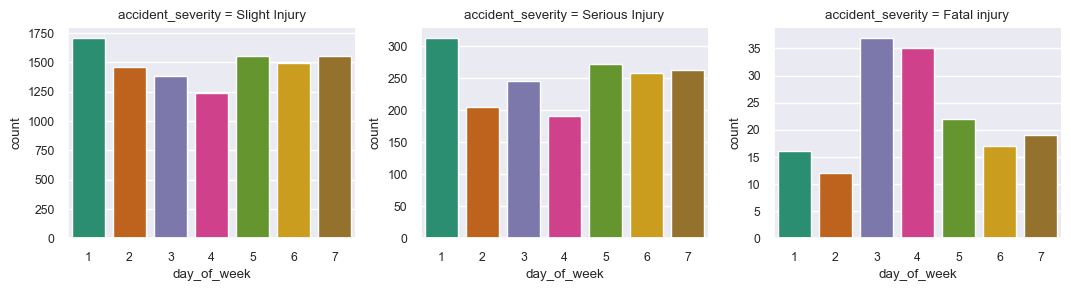

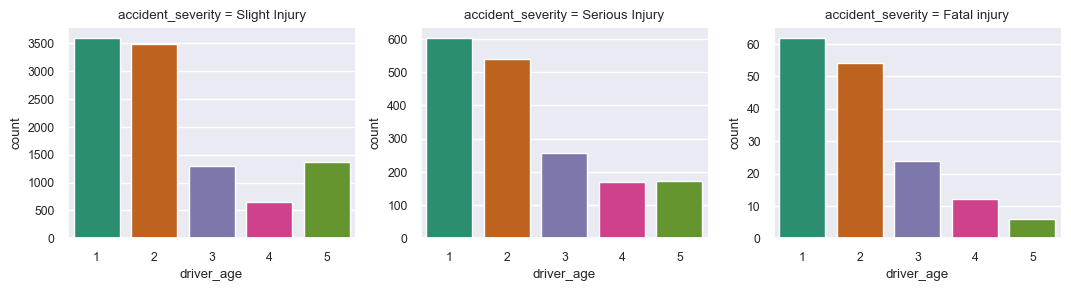

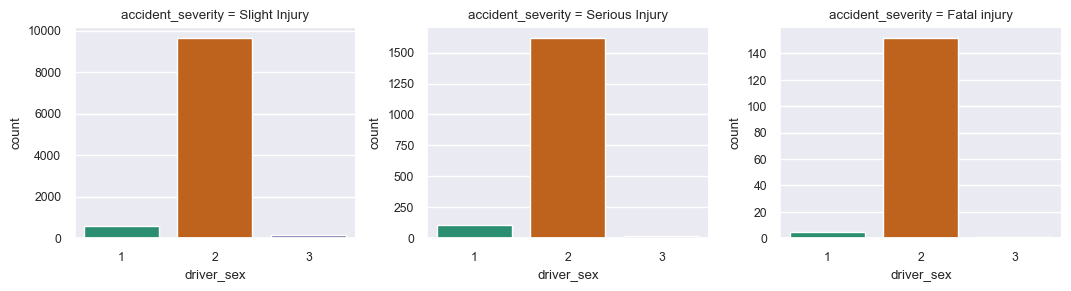

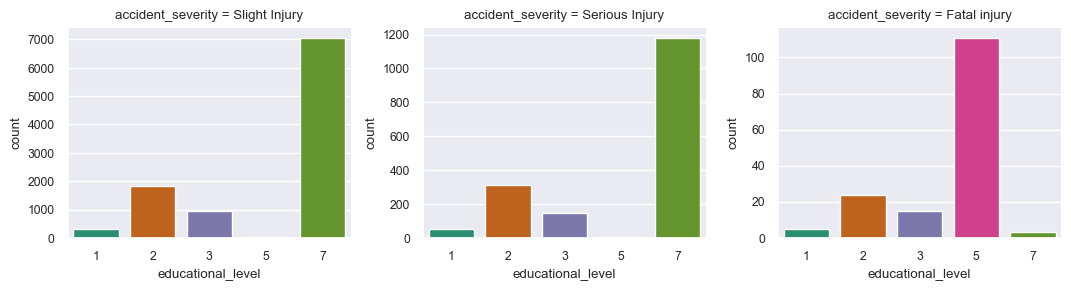

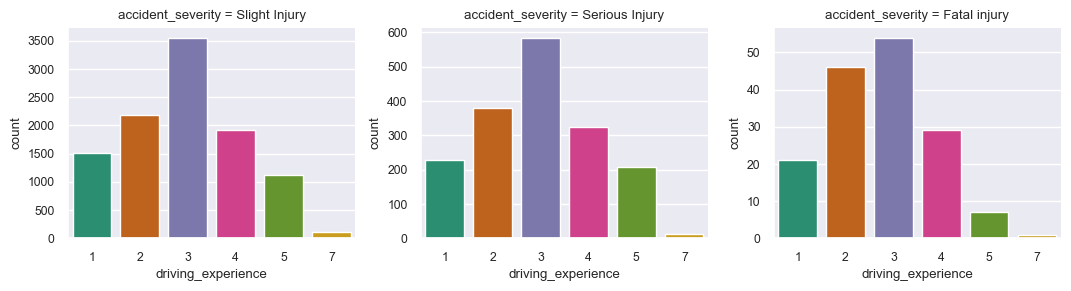

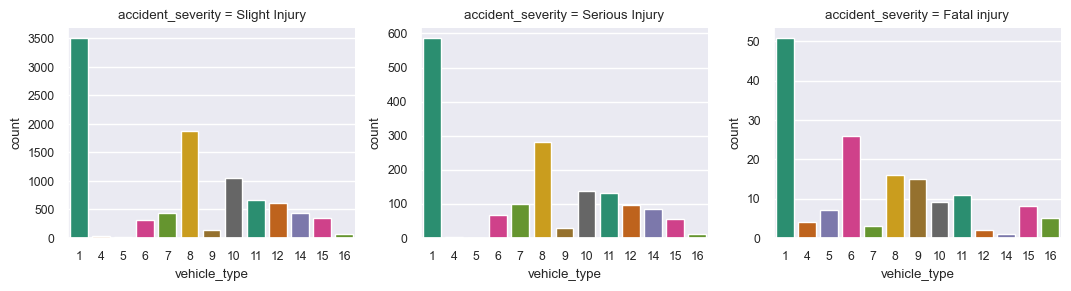

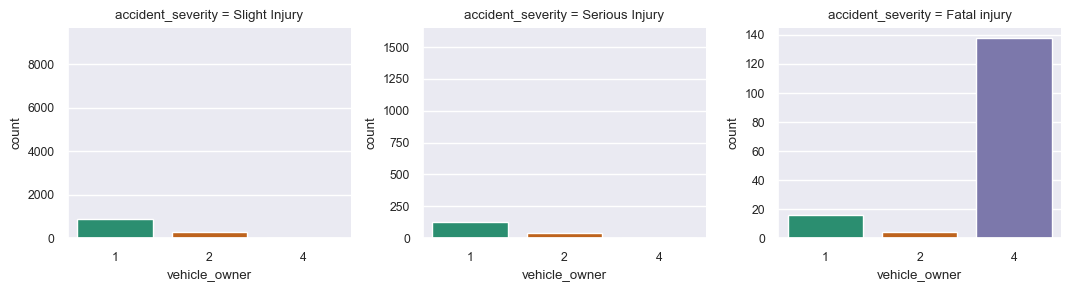

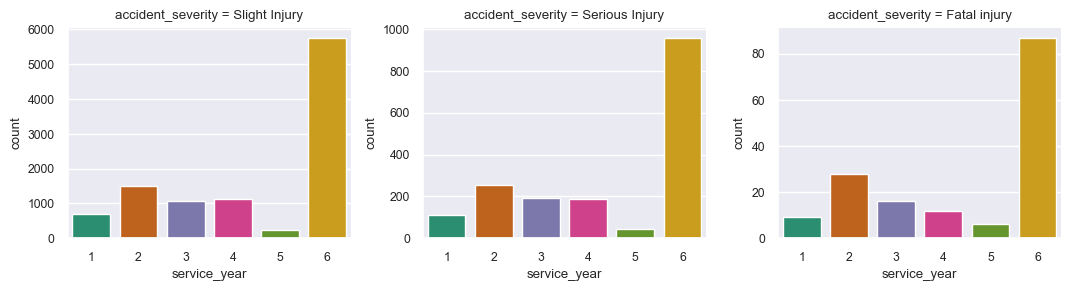

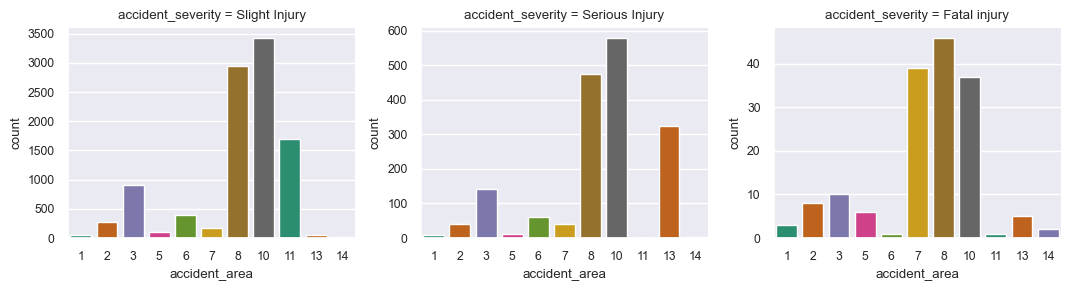

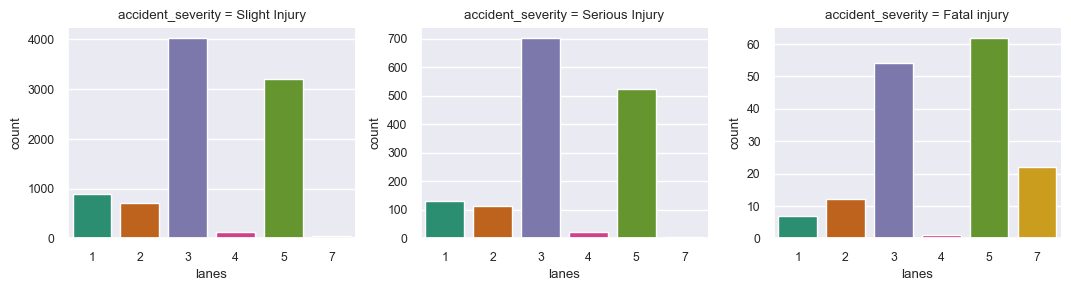

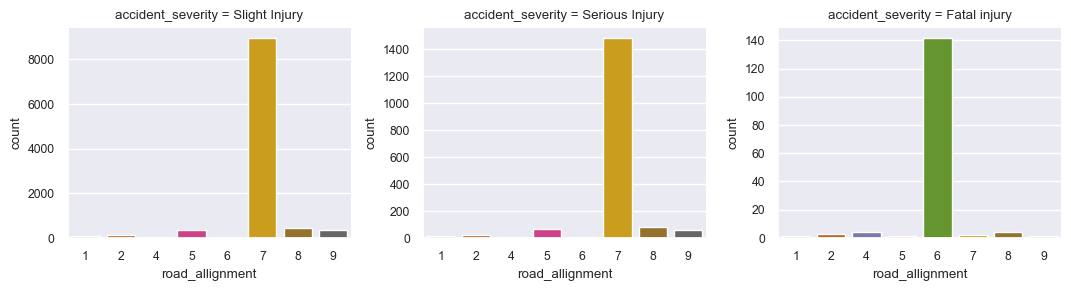

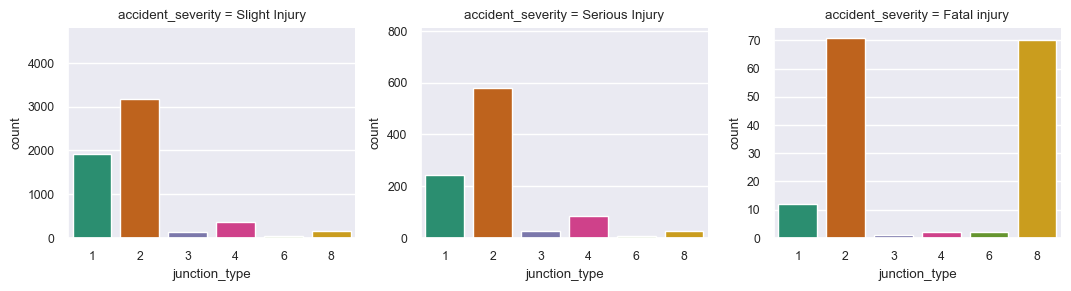

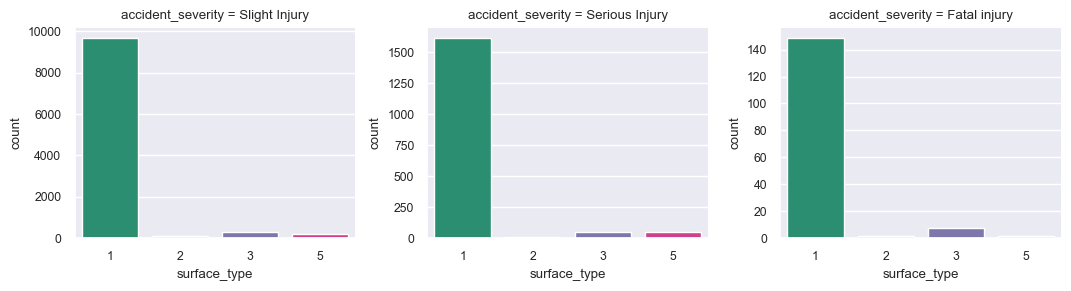

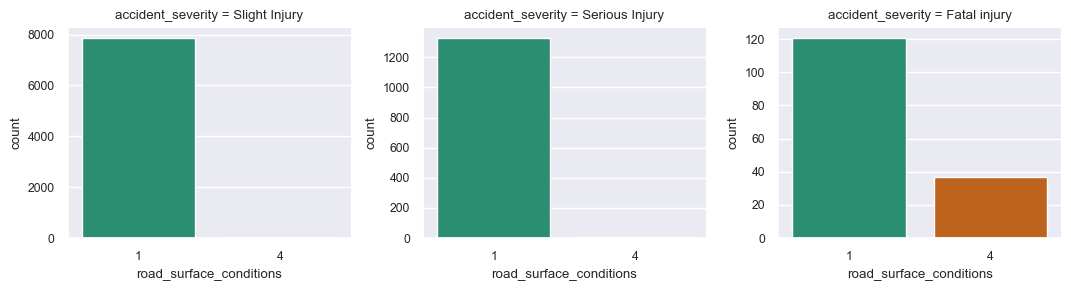

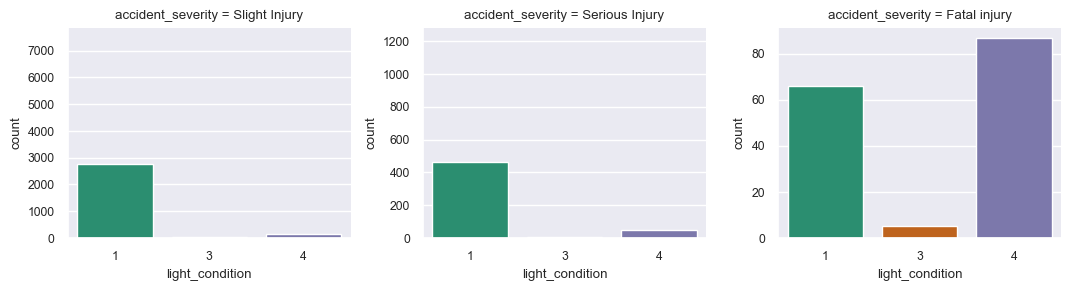

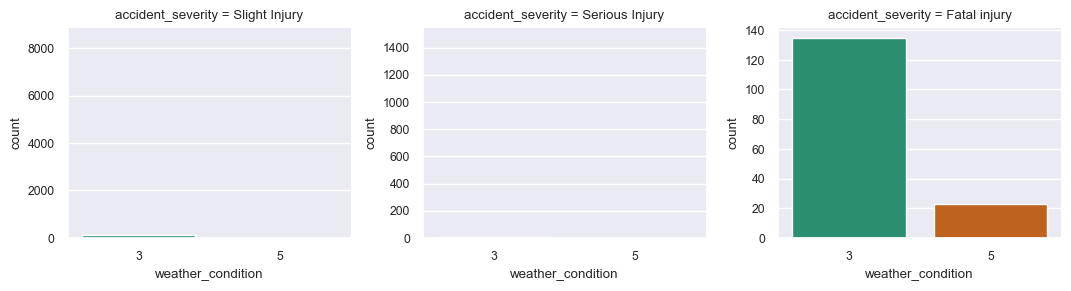

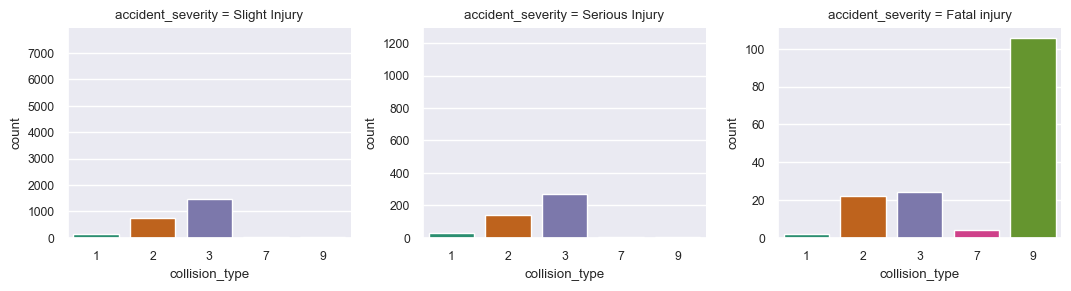

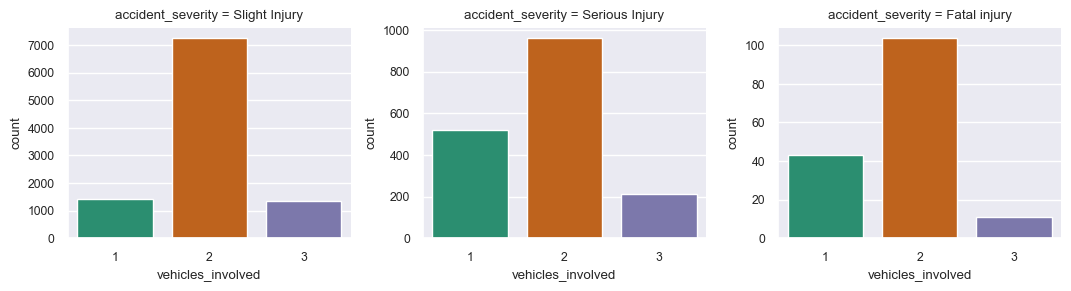

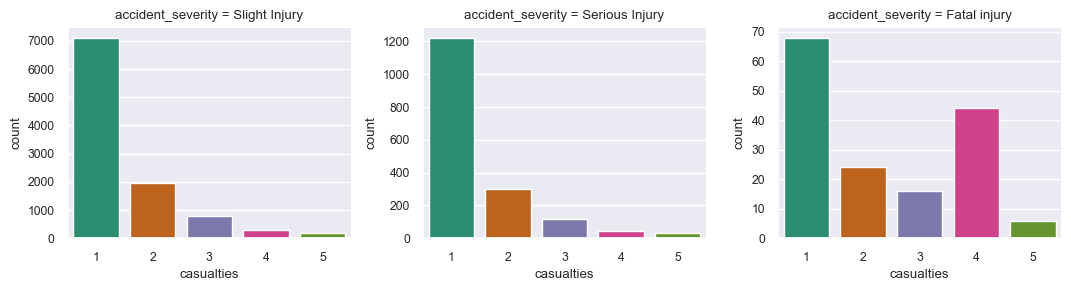

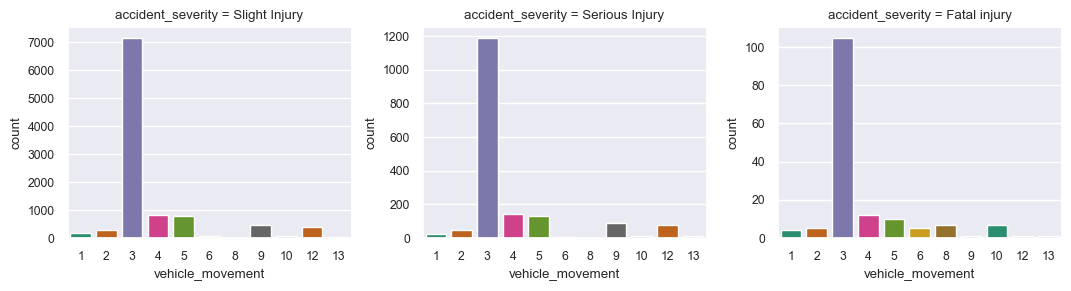

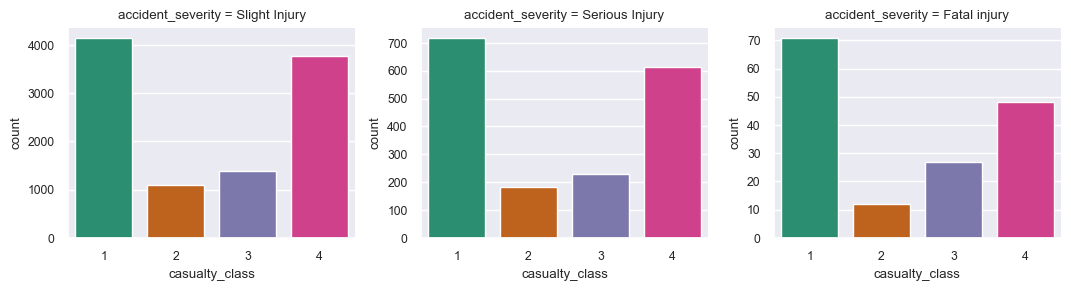

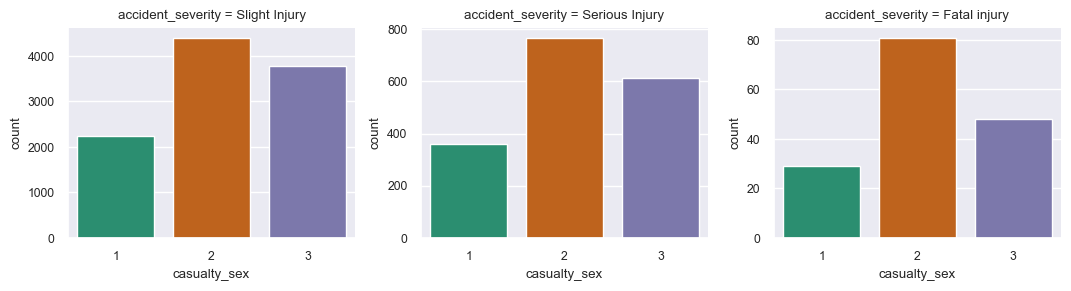

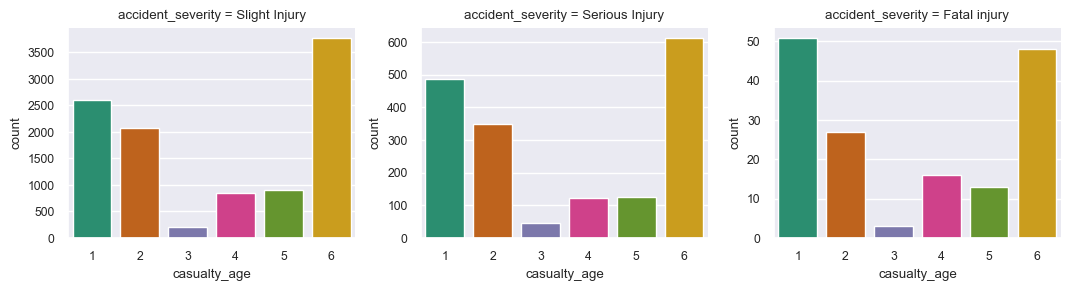

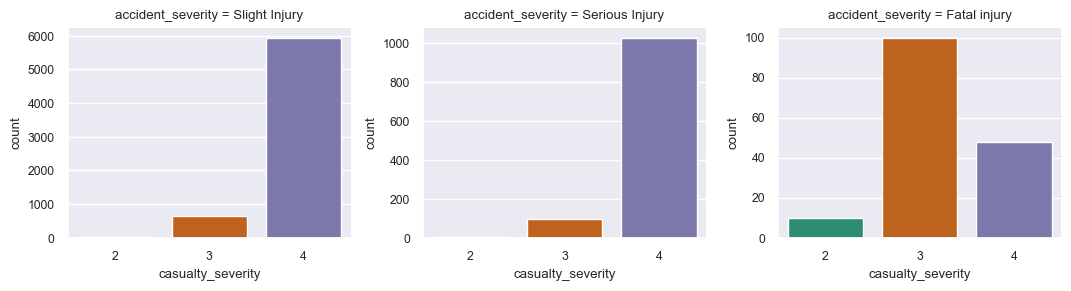

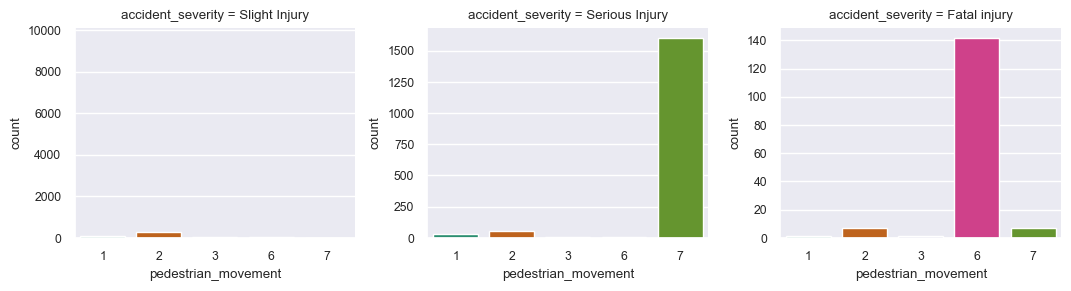

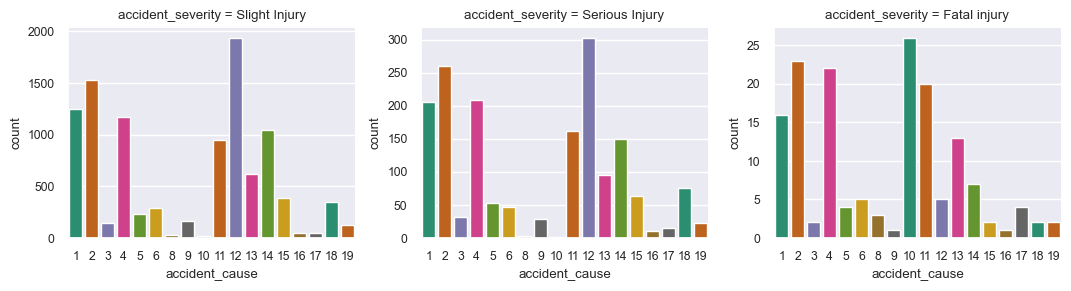

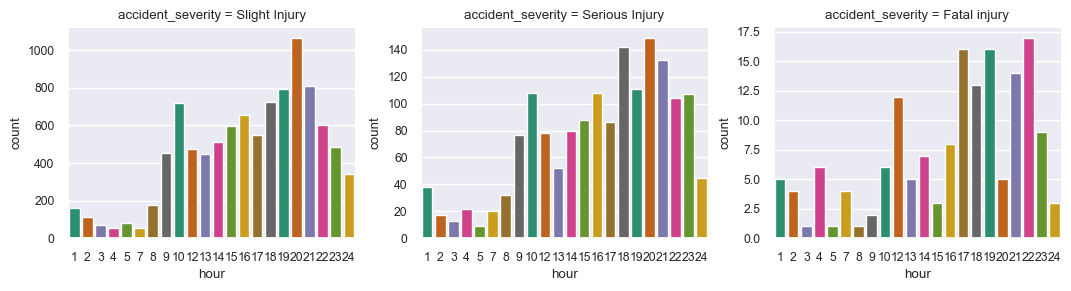

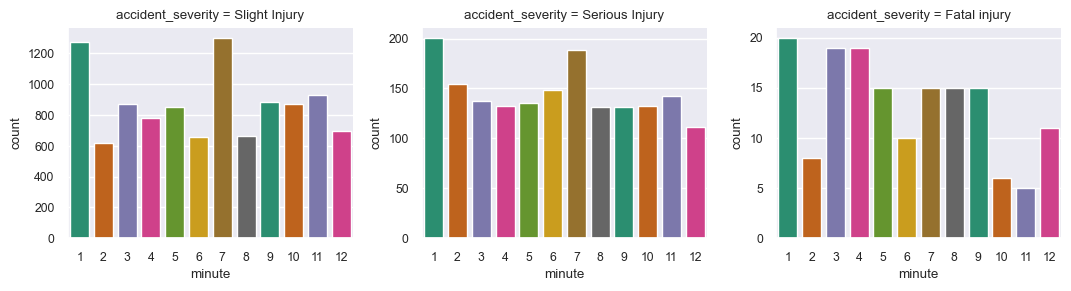

In [102]:
for col in rta_data.drop('accident_severity', axis=1):
    p = sns.FacetGrid(rta_data, col='accident_severity', aspect=1.2, sharey=False)
    p.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

<AxesSubplot: >

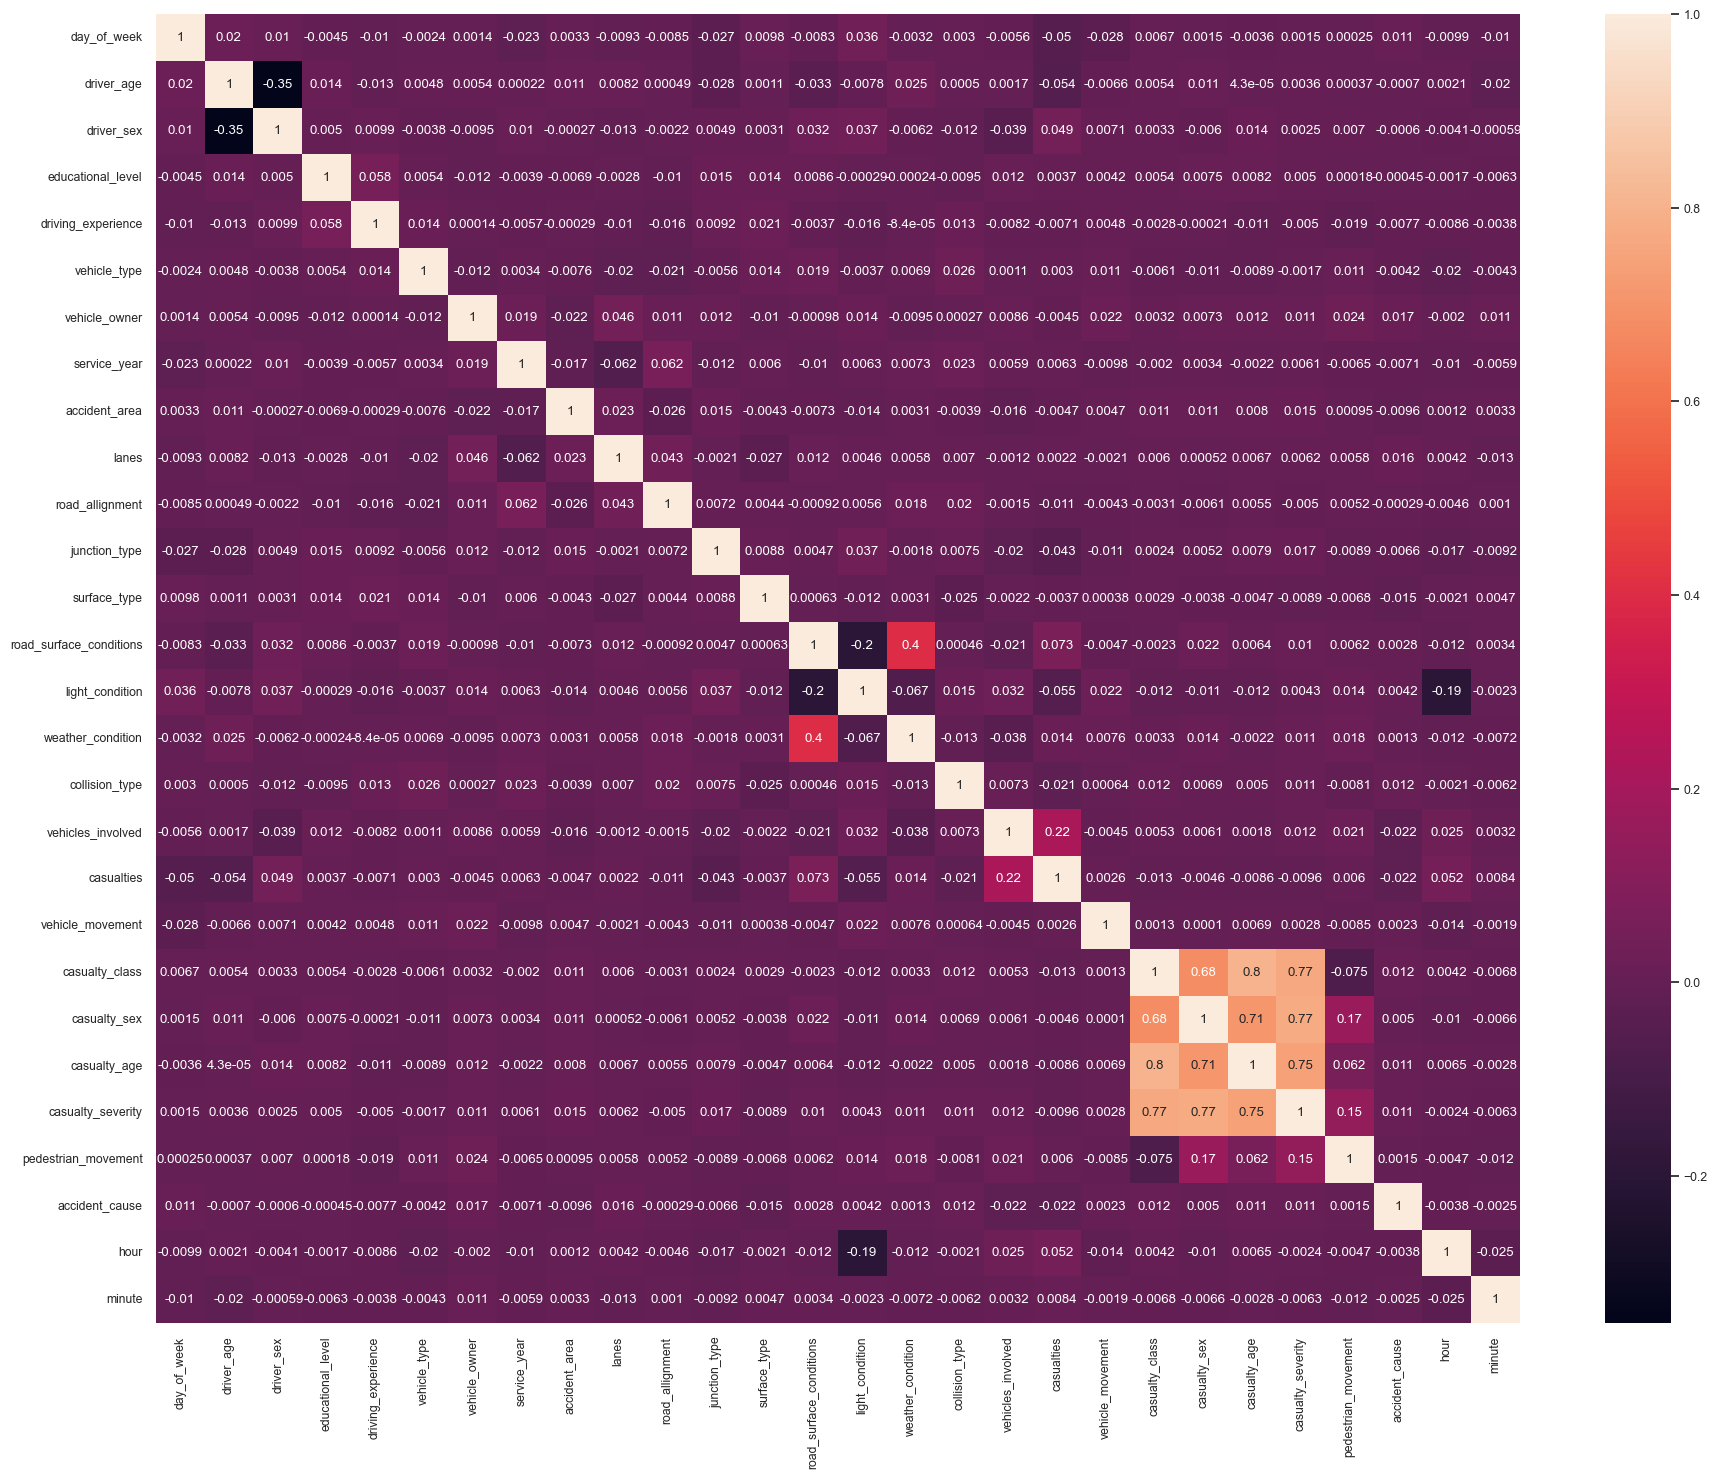

In [103]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(rta_data.corr(), annot=True)

## Sampling

In [104]:
X = rta_data.drop(['accident_severity'], axis=1)
Y = rta_data['accident_severity']

In [105]:
Y

0         Slight Injury
1         Slight Injury
2        Serious Injury
3         Slight Injury
4         Slight Injury
              ...      
12311     Slight Injury
12312     Slight Injury
12313    Serious Injury
12314     Slight Injury
12315     Slight Injury
Name: accident_severity, Length: 12316, dtype: object

## Model evaluation

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 29) (3695, 29) (8621,) (3695,)


In [116]:
model = RandomForestClassifier()
model.fit(x_train.values, y_train)

RandomForestClassifier()

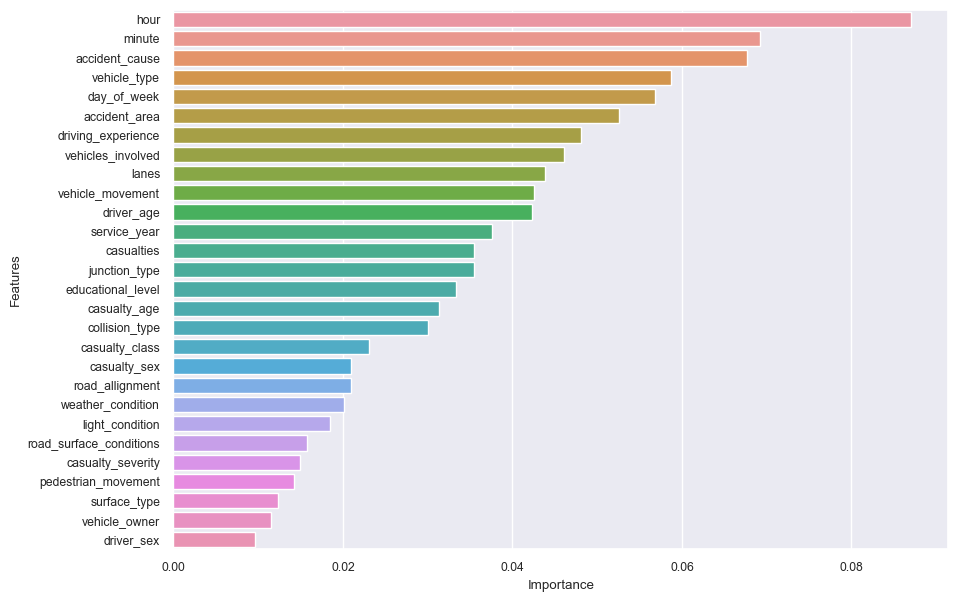

In [117]:
df_importance = pd.DataFrame()
df_importance['Features'] = x.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 7))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [118]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['hour',
 'minute',
 'accident_cause',
 'vehicle_type',
 'day_of_week',
 'accident_area',
 'driving_experience',
 'vehicles_involved',
 'lanes',
 'vehicle_movement']

In [119]:
df_top10 = rta_data[top10]
df_top10

hour  minute  accident_cause  vehicle_type  day_of_week  accident_area  \
0        18       2              10             1            2             10   
1        18       2              17            12            2              7   
2        18       2               1             6            2              2   
3         2       3               2            12            4              7   
4         2       3              17             1            4              5   
...     ...     ...             ...           ...          ...            ...   
12311    17       4              11             5            7              6   
12312    19       1              11             1            4              6   
12313    14      12               2             2            4              6   
12314    14      12               6             6            4              7   
12315    14      12               2             8            4              6   

       driving_experience  vehicles_involved  lanes  vehicle_movement  
0                       1                  2      3                 3  
1                       4                  2      5                 3  
2                       1                  2      7                 3  
3                       3                  2      7                 3  
4                       2                  2      7                 3  
...                   ...                ...    ...               ...  
12311                   2                  2      5                 3  
12312                   3                  2      3                 5  
12313                   3                  1      3                 5  
12314                   4                  2      5                 5  
12315                   3                  2      5                 9  

[12316 rows x 10 columns]

In [120]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [121]:
# fitting model
model.fit(X_train_new.values, y_train_new)

RandomForestClassifier()

In [122]:
# predicting
y_pred_new = model.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.8335588633288228


In [123]:
import joblib

In [124]:
joblib.dump(model, "RandomForestClassifier_Model")

['RandomForestClassifier_Model']